In [1]:
from pyspark.sql import SparkSession

# Initialize a Spark session
spark = SparkSession.builder \
    .appName("Load CSV with PySpark") \
    .getOrCreate()0

# Define the dataset path
dataset_path = r"C:\Users\yoges\Desktop\bda\Traffic_Crashes_-_Crashes_20241201.csv"

# Load the CSV file into a DataFrame
crashes_df = spark.read.format("csv") \
    .option("header", "true") \
    .option("inferSchema", "true") \
    .load(dataset_path)

# Show the first few rows of the DataFrame
crashes_df.show()

# Print the schema of the DataFrame
crashes_df.printSchema()


+--------------------+----------------+--------------------+------------------+----------------------+--------------------+-----------------+--------------------+--------------------+--------------------+--------+------------------+--------------------+-----------+--------------------+--------------------+----------------------+------------------+-------------+-------------+--------------------+-----------------------+----------------------+---------+----------------+-----------------+------------------+--------------+------------------+---------+-----------+--------------+-----------------+---------+--------------------+--------------+--------------+-----------------------+---------------------------+-----------------------------+----------------------+----------------+----------+-----------------+-----------+------------+-------------+--------------------+
|     CRASH_RECORD_ID|CRASH_DATE_EST_I|          CRASH_DATE|POSTED_SPEED_LIMIT|TRAFFIC_CONTROL_DEVICE|    DEVICE_CONDITION|WEATHE

In [3]:
# Get the first 5 rows as a list of Row objects
first_five_rows = crashes_df.head(5)

# Print each row
for row in first_five_rows:
    print(row)


Row(CRASH_RECORD_ID='23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7a1179c4a1c091442a6eeab8352220c7c56ca1ff7c4b4b0fc345c74e3e85ecb9d43deeb66b5f803d4a0', CRASH_DATE_EST_I=None, CRASH_DATE='09/05/2023 07:05:00 PM', POSTED_SPEED_LIMIT=30, TRAFFIC_CONTROL_DEVICE='TRAFFIC SIGNAL', DEVICE_CONDITION='FUNCTIONING PROPERLY', WEATHER_CONDITION='CLEAR', LIGHTING_CONDITION='DUSK', FIRST_CRASH_TYPE='ANGLE', TRAFFICWAY_TYPE='FIVE POINT, OR MORE', LANE_CNT=None, ALIGNMENT='STRAIGHT AND LEVEL', ROADWAY_SURFACE_COND='DRY', ROAD_DEFECT='NO DEFECTS', REPORT_TYPE='ON SCENE', CRASH_TYPE='INJURY AND / OR TOW DUE TO CRASH', INTERSECTION_RELATED_I='Y', NOT_RIGHT_OF_WAY_I=None, HIT_AND_RUN_I=None, DAMAGE='OVER $1,500', DATE_POLICE_NOTIFIED='09/05/2023 07:05:00 PM', PRIM_CONTRIBUTORY_CAUSE='UNABLE TO DETERMINE', SEC_CONTRIBUTORY_CAUSE='NOT APPLICABLE', STREET_NO=5500, STREET_DIRECTION='S', STREET_NAME='WENTWORTH AVE', BEAT_OF_OCCURRENCE=225, PHOTOS_TAKEN_I=None, STATEMENTS_TAKEN_I=None, DOORING_I=None, WORK_ZONE

In [4]:
# Find the number of rows
num_rows = crashes_df.count()

# Find the number of columns
num_columns = len(crashes_df.columns)

# Print the results
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")


Number of rows: 897648
Number of columns: 48


In [5]:
from pyspark.sql.functions import col, sum, when

# Count null values in each column
null_counts = crashes_df.select(
    [
        sum(when(col(c).isNull(), 1).otherwise(0)).alias(c)
        for c in crashes_df.columns
    ]
)

# Show the results
null_counts.show()


+---------------+----------------+----------+------------------+----------------------+----------------+-----------------+------------------+----------------+---------------+--------+---------+--------------------+-----------+-----------+----------+----------------------+------------------+-------------+------+--------------------+-----------------------+----------------------+---------+----------------+-----------+------------------+--------------+------------------+---------+-----------+--------------+-----------------+---------+------------------+--------------+--------------+-----------------------+---------------------------+-----------------------------+----------------------+----------------+----------+-----------------+-----------+--------+---------+--------+
|CRASH_RECORD_ID|CRASH_DATE_EST_I|CRASH_DATE|POSTED_SPEED_LIMIT|TRAFFIC_CONTROL_DEVICE|DEVICE_CONDITION|WEATHER_CONDITION|LIGHTING_CONDITION|FIRST_CRASH_TYPE|TRAFFICWAY_TYPE|LANE_CNT|ALIGNMENT|ROADWAY_SURFACE_COND|ROAD_DEF

In [6]:
# List of columns to drop
columns_to_drop = [
    'CRASH_DATE_EST_I',
    'LANE_CNT',
    'INTERSECTION_RELATED_I',
    'NOT_RIGHT_OF_WAY_I',
    'PHOTOS_TAKEN_I',
    'STATEMENTS_TAKEN_I',
    'DOORING_I',
    'WORK_ZONE_I',
    'WORK_ZONE_TYPE',
    'WORKERS_PRESENT_I',
    'CRASH_RECORD_ID',
    'LOCATION',
]

# Drop the specified columns from the DataFrame
crashes_df = crashes_df.drop(*columns_to_drop)

# Show the first few rows of the cleaned DataFrame
crashes_df.show()

# Print the schema to verify the columns have been dropped
crashes_df.printSchema()


+--------------------+------------------+----------------------+--------------------+-----------------+--------------------+--------------------+--------------------+------------------+--------------------+-----------+--------------------+--------------------+-------------+-------------+--------------------+-----------------------+----------------------+---------+----------------+-----------------+------------------+---------+--------------------+--------------+--------------+-----------------------+---------------------------+-----------------------------+----------------------+----------------+----------+-----------------+-----------+------------+-------------+
|          CRASH_DATE|POSTED_SPEED_LIMIT|TRAFFIC_CONTROL_DEVICE|    DEVICE_CONDITION|WEATHER_CONDITION|  LIGHTING_CONDITION|    FIRST_CRASH_TYPE|     TRAFFICWAY_TYPE|         ALIGNMENT|ROADWAY_SURFACE_COND|ROAD_DEFECT|         REPORT_TYPE|          CRASH_TYPE|HIT_AND_RUN_I|       DAMAGE|DATE_POLICE_NOTIFIED|PRIM_CONTRIBUTORY_C

In [7]:
# Get the first 5 rows as a list of Row objects
first_five_rows = crashes_df.head(5)

# Print each row
for row in first_five_rows:
    print(row)


Row(CRASH_DATE='09/05/2023 07:05:00 PM', POSTED_SPEED_LIMIT=30, TRAFFIC_CONTROL_DEVICE='TRAFFIC SIGNAL', DEVICE_CONDITION='FUNCTIONING PROPERLY', WEATHER_CONDITION='CLEAR', LIGHTING_CONDITION='DUSK', FIRST_CRASH_TYPE='ANGLE', TRAFFICWAY_TYPE='FIVE POINT, OR MORE', ALIGNMENT='STRAIGHT AND LEVEL', ROADWAY_SURFACE_COND='DRY', ROAD_DEFECT='NO DEFECTS', REPORT_TYPE='ON SCENE', CRASH_TYPE='INJURY AND / OR TOW DUE TO CRASH', HIT_AND_RUN_I=None, DAMAGE='OVER $1,500', DATE_POLICE_NOTIFIED='09/05/2023 07:05:00 PM', PRIM_CONTRIBUTORY_CAUSE='UNABLE TO DETERMINE', SEC_CONTRIBUTORY_CAUSE='NOT APPLICABLE', STREET_NO=5500, STREET_DIRECTION='S', STREET_NAME='WENTWORTH AVE', BEAT_OF_OCCURRENCE=225, NUM_UNITS=2, MOST_SEVERE_INJURY='INCAPACITATING INJURY', INJURIES_TOTAL=3, INJURIES_FATAL=0, INJURIES_INCAPACITATING=1, INJURIES_NON_INCAPACITATING=2, INJURIES_REPORTED_NOT_EVIDENT=0, INJURIES_NO_INDICATION=2, INJURIES_UNKNOWN=0, CRASH_HOUR=19, CRASH_DAY_OF_WEEK=3, CRASH_MONTH=9, LATITUDE=None, LONGITUDE=None

In [8]:
# Find the number of rows
num_rows = crashes_df.count()

# Find the number of columns
num_columns = len(crashes_df.columns)

# Print the results
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")


Number of rows: 897648
Number of columns: 36


In [9]:
from pyspark.sql.functions import col, sum, when

# Count null values in each column
null_counts = crashes_df.select(
    [
        sum(when(col(c).isNull(), 1).otherwise(0)).alias(c)
        for c in crashes_df.columns
    ]
)

# Show the results
null_counts.show()


+----------+------------------+----------------------+----------------+-----------------+------------------+----------------+---------------+---------+--------------------+-----------+-----------+----------+-------------+------+--------------------+-----------------------+----------------------+---------+----------------+-----------+------------------+---------+------------------+--------------+--------------+-----------------------+---------------------------+-----------------------------+----------------------+----------------+----------+-----------------+-----------+--------+---------+
|CRASH_DATE|POSTED_SPEED_LIMIT|TRAFFIC_CONTROL_DEVICE|DEVICE_CONDITION|WEATHER_CONDITION|LIGHTING_CONDITION|FIRST_CRASH_TYPE|TRAFFICWAY_TYPE|ALIGNMENT|ROADWAY_SURFACE_COND|ROAD_DEFECT|REPORT_TYPE|CRASH_TYPE|HIT_AND_RUN_I|DAMAGE|DATE_POLICE_NOTIFIED|PRIM_CONTRIBUTORY_CAUSE|SEC_CONTRIBUTORY_CAUSE|STREET_NO|STREET_DIRECTION|STREET_NAME|BEAT_OF_OCCURRENCE|NUM_UNITS|MOST_SEVERE_INJURY|INJURIES_TOTAL|INJURI

In [10]:
# Count occurrences of each value in the 'REPORT_TYPE' column
report_type_counts = crashes_df.groupBy("REPORT_TYPE").count()

# Show the results sorted by count in descending order
report_type_counts.orderBy("count", ascending=False).show()


+--------------------+------+
|         REPORT_TYPE| count|
+--------------------+------+
|NOT ON SCENE (DES...|488788|
|            ON SCENE|380751|
|                NULL| 27869|
|             AMENDED|   240|
+--------------------+------+



In [11]:
# Filter rows where 'INJURIES_TOTAL' is null
injuries_null = crashes_df.filter(crashes_df["INJURIES_TOTAL"].isNull())

# Show the filtered rows
injuries_null.show()

# Count the number of rows where 'INJURIES_TOTAL' is null
null_count = injuries_null.count()
print(f"Number of rows where 'INJURIES_TOTAL' is null: {null_count}")


+--------------------+------------------+----------------------+--------------------+-----------------+--------------------+--------------------+--------------------+--------------------+--------------------+-----------+--------------------+--------------------+-------------+-------------+--------------------+-----------------------+----------------------+---------+----------------+----------------+------------------+---------+------------------+--------------+--------------+-----------------------+---------------------------+-----------------------------+----------------------+----------------+----------+-----------------+-----------+------------+-------------+
|          CRASH_DATE|POSTED_SPEED_LIMIT|TRAFFIC_CONTROL_DEVICE|    DEVICE_CONDITION|WEATHER_CONDITION|  LIGHTING_CONDITION|    FIRST_CRASH_TYPE|     TRAFFICWAY_TYPE|           ALIGNMENT|ROADWAY_SURFACE_COND|ROAD_DEFECT|         REPORT_TYPE|          CRASH_TYPE|HIT_AND_RUN_I|       DAMAGE|DATE_POLICE_NOTIFIED|PRIM_CONTRIBUTORY_

Number of rows where 'INJURIES_TOTAL' is null: 1974


In [12]:
# Filter out rows where 'INJURIES_TOTAL' is null and assign it back to crashes_df
crashes_df = crashes_df.filter(crashes_df['INJURIES_TOTAL'].isNotNull())

# Show the cleaned DataFrame
crashes_df.show()

# Count the number of rows after dropping nulls
print(f"Number of rows after dropping: {crashes_df.count()}")


+--------------------+------------------+----------------------+--------------------+-----------------+--------------------+--------------------+--------------------+------------------+--------------------+-----------+--------------------+--------------------+-------------+-------------+--------------------+-----------------------+----------------------+---------+----------------+-----------------+------------------+---------+--------------------+--------------+--------------+-----------------------+---------------------------+-----------------------------+----------------------+----------------+----------+-----------------+-----------+------------+-------------+
|          CRASH_DATE|POSTED_SPEED_LIMIT|TRAFFIC_CONTROL_DEVICE|    DEVICE_CONDITION|WEATHER_CONDITION|  LIGHTING_CONDITION|    FIRST_CRASH_TYPE|     TRAFFICWAY_TYPE|         ALIGNMENT|ROADWAY_SURFACE_COND|ROAD_DEFECT|         REPORT_TYPE|          CRASH_TYPE|HIT_AND_RUN_I|       DAMAGE|DATE_POLICE_NOTIFIED|PRIM_CONTRIBUTORY_C

Number of rows after dropping: 895674


In [13]:
from pyspark.sql.functions import col, sum, when

# Count null values in each column
null_counts = crashes_df.select(
    [
        sum(when(col(c).isNull(), 1).otherwise(0)).alias(c)
        for c in crashes_df.columns
    ]
)

# Show the results
null_counts.show()


+----------+------------------+----------------------+----------------+-----------------+------------------+----------------+---------------+---------+--------------------+-----------+-----------+----------+-------------+------+--------------------+-----------------------+----------------------+---------+----------------+-----------+------------------+---------+------------------+--------------+--------------+-----------------------+---------------------------+-----------------------------+----------------------+----------------+----------+-----------------+-----------+--------+---------+
|CRASH_DATE|POSTED_SPEED_LIMIT|TRAFFIC_CONTROL_DEVICE|DEVICE_CONDITION|WEATHER_CONDITION|LIGHTING_CONDITION|FIRST_CRASH_TYPE|TRAFFICWAY_TYPE|ALIGNMENT|ROADWAY_SURFACE_COND|ROAD_DEFECT|REPORT_TYPE|CRASH_TYPE|HIT_AND_RUN_I|DAMAGE|DATE_POLICE_NOTIFIED|PRIM_CONTRIBUTORY_CAUSE|SEC_CONTRIBUTORY_CAUSE|STREET_NO|STREET_DIRECTION|STREET_NAME|BEAT_OF_OCCURRENCE|NUM_UNITS|MOST_SEVERE_INJURY|INJURIES_TOTAL|INJURI

In [14]:
# Drop the 'REPORT_TYPE' column
crashes_df = crashes_df.drop('REPORT_TYPE')

# Show the updated DataFrame
crashes_df.show()

# Confirm the columns after dropping
print(crashes_df.columns)


+--------------------+------------------+----------------------+--------------------+-----------------+--------------------+--------------------+--------------------+------------------+--------------------+-----------+--------------------+-------------+-------------+--------------------+-----------------------+----------------------+---------+----------------+-----------------+------------------+---------+--------------------+--------------+--------------+-----------------------+---------------------------+-----------------------------+----------------------+----------------+----------+-----------------+-----------+------------+-------------+
|          CRASH_DATE|POSTED_SPEED_LIMIT|TRAFFIC_CONTROL_DEVICE|    DEVICE_CONDITION|WEATHER_CONDITION|  LIGHTING_CONDITION|    FIRST_CRASH_TYPE|     TRAFFICWAY_TYPE|         ALIGNMENT|ROADWAY_SURFACE_COND|ROAD_DEFECT|          CRASH_TYPE|HIT_AND_RUN_I|       DAMAGE|DATE_POLICE_NOTIFIED|PRIM_CONTRIBUTORY_CAUSE|SEC_CONTRIBUTORY_CAUSE|STREET_NO|STRE

In [15]:
from pyspark.sql.functions import col, sum, when

# Count null values in each column
null_counts = crashes_df.select(
    [
        sum(when(col(c).isNull(), 1).otherwise(0)).alias(c)
        for c in crashes_df.columns
    ]
)

# Show the results
null_counts.show()


+----------+------------------+----------------------+----------------+-----------------+------------------+----------------+---------------+---------+--------------------+-----------+----------+-------------+------+--------------------+-----------------------+----------------------+---------+----------------+-----------+------------------+---------+------------------+--------------+--------------+-----------------------+---------------------------+-----------------------------+----------------------+----------------+----------+-----------------+-----------+--------+---------+
|CRASH_DATE|POSTED_SPEED_LIMIT|TRAFFIC_CONTROL_DEVICE|DEVICE_CONDITION|WEATHER_CONDITION|LIGHTING_CONDITION|FIRST_CRASH_TYPE|TRAFFICWAY_TYPE|ALIGNMENT|ROADWAY_SURFACE_COND|ROAD_DEFECT|CRASH_TYPE|HIT_AND_RUN_I|DAMAGE|DATE_POLICE_NOTIFIED|PRIM_CONTRIBUTORY_CAUSE|SEC_CONTRIBUTORY_CAUSE|STREET_NO|STREET_DIRECTION|STREET_NAME|BEAT_OF_OCCURRENCE|NUM_UNITS|MOST_SEVERE_INJURY|INJURIES_TOTAL|INJURIES_FATAL|INJURIES_INCAPA

In [16]:
# Group by 'STREET_DIRECTION' and count the occurrences of each value
street_direction_counts = crashes_df.groupBy('STREET_DIRECTION').count()

# Show the value counts
street_direction_counts.show()


+----------------+------+
|STREET_DIRECTION| count|
+----------------+------+
|            NULL|     4|
|               E| 60448|
|               N|215361|
|               W|320801|
|               S|299060|
+----------------+------+



In [17]:
# Group by 'MOST_SEVERE_INJURY' and count the occurrences of each value
most_severe_injury_counts = crashes_df.groupBy('MOST_SEVERE_INJURY').count()

# Show the value counts
most_severe_injury_counts.show()


+--------------------+------+
|  MOST_SEVERE_INJURY| count|
+--------------------+------+
|                NULL|    14|
|               FATAL|   982|
|NONINCAPACITATING...| 70835|
|NO INDICATION OF ...|769561|
|INCAPACITATING IN...| 15037|
|REPORTED, NOT EVI...| 39245|
+--------------------+------+



In [18]:
# Group by 'BEAT_OF_OCCURRENCE' and count the occurrences of each value
beat_of_occurrence_counts = crashes_df.groupBy('BEAT_OF_OCCURRENCE').count()

# Show the value counts
beat_of_occurrence_counts.show()


+------------------+-----+
|BEAT_OF_OCCURRENCE|count|
+------------------+-----+
|               833| 7318|
|              1522| 4030|
|               623| 5486|
|              1650|   68|
|              2525| 1972|
|              1223| 3056|
|               133| 2146|
|               322| 3158|
|              1133| 3803|
|               513| 2566|
|               321| 3232|
|              1533| 4812|
|               613| 2249|
|               633| 1565|
|              1653|  495|
|              2513| 2310|
|              1212| 2339|
|              1924| 2478|
|               211| 2432|
|              1823| 1508|
+------------------+-----+
only showing top 20 rows



In [19]:
# Drop the 'BEAT_OF_OCCURRENCE' column
crashes_df = crashes_df.drop('BEAT_OF_OCCURRENCE')

# Show the updated DataFrame
crashes_df.show()

# Confirm the columns after dropping
print(crashes_df.columns)


+--------------------+------------------+----------------------+--------------------+-----------------+--------------------+--------------------+--------------------+------------------+--------------------+-----------+--------------------+-------------+-------------+--------------------+-----------------------+----------------------+---------+----------------+-----------------+---------+--------------------+--------------+--------------+-----------------------+---------------------------+-----------------------------+----------------------+----------------+----------+-----------------+-----------+------------+-------------+
|          CRASH_DATE|POSTED_SPEED_LIMIT|TRAFFIC_CONTROL_DEVICE|    DEVICE_CONDITION|WEATHER_CONDITION|  LIGHTING_CONDITION|    FIRST_CRASH_TYPE|     TRAFFICWAY_TYPE|         ALIGNMENT|ROADWAY_SURFACE_COND|ROAD_DEFECT|          CRASH_TYPE|HIT_AND_RUN_I|       DAMAGE|DATE_POLICE_NOTIFIED|PRIM_CONTRIBUTORY_CAUSE|SEC_CONTRIBUTORY_CAUSE|STREET_NO|STREET_DIRECTION|      

In [20]:
from pyspark.sql.functions import col, sum, when

# Count null values in each column
null_counts = crashes_df.select(
    [
        sum(when(col(c).isNull(), 1).otherwise(0)).alias(c)
        for c in crashes_df.columns
    ]
)

# Show the results
null_counts.show()


+----------+------------------+----------------------+----------------+-----------------+------------------+----------------+---------------+---------+--------------------+-----------+----------+-------------+------+--------------------+-----------------------+----------------------+---------+----------------+-----------+---------+------------------+--------------+--------------+-----------------------+---------------------------+-----------------------------+----------------------+----------------+----------+-----------------+-----------+--------+---------+
|CRASH_DATE|POSTED_SPEED_LIMIT|TRAFFIC_CONTROL_DEVICE|DEVICE_CONDITION|WEATHER_CONDITION|LIGHTING_CONDITION|FIRST_CRASH_TYPE|TRAFFICWAY_TYPE|ALIGNMENT|ROADWAY_SURFACE_COND|ROAD_DEFECT|CRASH_TYPE|HIT_AND_RUN_I|DAMAGE|DATE_POLICE_NOTIFIED|PRIM_CONTRIBUTORY_CAUSE|SEC_CONTRIBUTORY_CAUSE|STREET_NO|STREET_DIRECTION|STREET_NAME|NUM_UNITS|MOST_SEVERE_INJURY|INJURIES_TOTAL|INJURIES_FATAL|INJURIES_INCAPACITATING|INJURIES_NON_INCAPACITATING|I

In [21]:
# Filter out rows where 'INJURIES_TOTAL' is null and assign it back to crashes_df
crashes_df = crashes_df.filter(crashes_df['STREET_NAME'].isNotNull())

# Show the cleaned DataFrame
crashes_df.show()

# Count the number of rows after dropping nulls
print(f"Number of rows after dropping: {crashes_df.count()}")


+--------------------+------------------+----------------------+--------------------+-----------------+--------------------+--------------------+--------------------+------------------+--------------------+-----------+--------------------+-------------+-------------+--------------------+-----------------------+----------------------+---------+----------------+-----------------+---------+--------------------+--------------+--------------+-----------------------+---------------------------+-----------------------------+----------------------+----------------+----------+-----------------+-----------+------------+-------------+
|          CRASH_DATE|POSTED_SPEED_LIMIT|TRAFFIC_CONTROL_DEVICE|    DEVICE_CONDITION|WEATHER_CONDITION|  LIGHTING_CONDITION|    FIRST_CRASH_TYPE|     TRAFFICWAY_TYPE|         ALIGNMENT|ROADWAY_SURFACE_COND|ROAD_DEFECT|          CRASH_TYPE|HIT_AND_RUN_I|       DAMAGE|DATE_POLICE_NOTIFIED|PRIM_CONTRIBUTORY_CAUSE|SEC_CONTRIBUTORY_CAUSE|STREET_NO|STREET_DIRECTION|      

Number of rows after dropping: 895673


In [22]:
from pyspark.sql import functions as F

# Find the most frequent value for 'STREET_DIRECTION'
mf_street_direction = crashes_df.groupBy('STREET_DIRECTION').count().orderBy(F.desc('count')).first()[0]

# Find the most frequent value for 'MOST_SEVERE_INJURY'
mf_most_severe_injury = crashes_df.groupBy('MOST_SEVERE_INJURY').count().orderBy(F.desc('count')).first()[0]

# Fill null values with the most frequent values
crashes_df = crashes_df.na.fill({'STREET_DIRECTION': mf_street_direction, 'MOST_SEVERE_INJURY': mf_most_severe_injury})

# Show the updated DataFrame
crashes_df.show()


+--------------------+------------------+----------------------+--------------------+-----------------+--------------------+--------------------+--------------------+------------------+--------------------+-----------+--------------------+-------------+-------------+--------------------+-----------------------+----------------------+---------+----------------+-----------------+---------+--------------------+--------------+--------------+-----------------------+---------------------------+-----------------------------+----------------------+----------------+----------+-----------------+-----------+------------+-------------+
|          CRASH_DATE|POSTED_SPEED_LIMIT|TRAFFIC_CONTROL_DEVICE|    DEVICE_CONDITION|WEATHER_CONDITION|  LIGHTING_CONDITION|    FIRST_CRASH_TYPE|     TRAFFICWAY_TYPE|         ALIGNMENT|ROADWAY_SURFACE_COND|ROAD_DEFECT|          CRASH_TYPE|HIT_AND_RUN_I|       DAMAGE|DATE_POLICE_NOTIFIED|PRIM_CONTRIBUTORY_CAUSE|SEC_CONTRIBUTORY_CAUSE|STREET_NO|STREET_DIRECTION|      

In [23]:
from pyspark.sql.functions import col, sum, when

# Count null values in each column
null_counts = crashes_df.select(
    [
        sum(when(col(c).isNull(), 1).otherwise(0)).alias(c)
        for c in crashes_df.columns
    ]
)

# Show the results
null_counts.show()


+----------+------------------+----------------------+----------------+-----------------+------------------+----------------+---------------+---------+--------------------+-----------+----------+-------------+------+--------------------+-----------------------+----------------------+---------+----------------+-----------+---------+------------------+--------------+--------------+-----------------------+---------------------------+-----------------------------+----------------------+----------------+----------+-----------------+-----------+--------+---------+
|CRASH_DATE|POSTED_SPEED_LIMIT|TRAFFIC_CONTROL_DEVICE|DEVICE_CONDITION|WEATHER_CONDITION|LIGHTING_CONDITION|FIRST_CRASH_TYPE|TRAFFICWAY_TYPE|ALIGNMENT|ROADWAY_SURFACE_COND|ROAD_DEFECT|CRASH_TYPE|HIT_AND_RUN_I|DAMAGE|DATE_POLICE_NOTIFIED|PRIM_CONTRIBUTORY_CAUSE|SEC_CONTRIBUTORY_CAUSE|STREET_NO|STREET_DIRECTION|STREET_NAME|NUM_UNITS|MOST_SEVERE_INJURY|INJURIES_TOTAL|INJURIES_FATAL|INJURIES_INCAPACITATING|INJURIES_NON_INCAPACITATING|I

In [24]:
# Group by 'HIT_AND_RUN_I' and count the occurrences of each value
hit_and_run_counts = crashes_df.groupBy('HIT_AND_RUN_I').count()

# Show the value counts
hit_and_run_counts.show()


+-------------+------+
|HIT_AND_RUN_I| count|
+-------------+------+
|         NULL|614926|
|            Y|268827|
|            N| 11920|
+-------------+------+



In [25]:
# Get the list of column names
print(crashes_df.columns)


['CRASH_DATE', 'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO', 'STREET_DIRECTION', 'STREET_NAME', 'NUM_UNITS', 'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE', 'LONGITUDE']


In [26]:
from pyspark.sql import functions as F

# Filter the rows where 'HIT_AND_RUN_I' is null
hit_and_run_nulls = crashes_df.filter(F.col('HIT_AND_RUN_I').isNull())

# Select the columns from index 22 to 28 (0-based indexing: 22 to 29)
columns_to_sum = hit_and_run_nulls.select(hit_and_run_nulls.columns[22:29])

# Sum the values of the selected columns
sum_result = columns_to_sum.select([F.sum(c).alias(c) for c in columns_to_sum.columns])

# Show the sum of the selected columns
sum_result.show()


+--------------+--------------+-----------------------+---------------------------+-----------------------------+----------------------+----------------+
|INJURIES_TOTAL|INJURIES_FATAL|INJURIES_INCAPACITATING|INJURIES_NON_INCAPACITATING|INJURIES_REPORTED_NOT_EVIDENT|INJURIES_NO_INDICATION|INJURIES_UNKNOWN|
+--------------+--------------+-----------------------+---------------------------+-----------------------------+----------------------+----------------+
|        136082|           847|                  13778|                      76096|                        45361|               1292197|               0|
+--------------+--------------+-----------------------+---------------------------+-----------------------------+----------------------+----------------+



In [27]:
from pyspark.sql import functions as F

# Filter the rows where 'HIT_AND_RUN_I' is not null
hit_and_run_not_nulls = crashes_df.filter(F.col('HIT_AND_RUN_I').isNotNull())

# Select the columns from index 22 to 28 (0-based indexing: 22 to 29)
columns_to_sum = hit_and_run_not_nulls.select(hit_and_run_not_nulls.columns[22:29])

# Sum the values of the selected columns
sum_result = columns_to_sum.select([F.sum(c).alias(c) for c in columns_to_sum.columns])

# Show the sum of the selected columns
sum_result.show()


+--------------+--------------+-----------------------+---------------------------+-----------------------------+----------------------+----------------+
|INJURIES_TOTAL|INJURIES_FATAL|INJURIES_INCAPACITATING|INJURIES_NON_INCAPACITATING|INJURIES_REPORTED_NOT_EVIDENT|INJURIES_NO_INDICATION|INJURIES_UNKNOWN|
+--------------+--------------+-----------------------+---------------------------+-----------------------------+----------------------+----------------+
|         37842|           218|                   3919|                      21347|                        12358|                500078|               0|
+--------------+--------------+-----------------------+---------------------------+-----------------------------+----------------------+----------------+



In [28]:
# Drop the 'INJURIES_UNKNOWN' column from the DataFrame
crashes_df = crashes_df.drop('INJURIES_UNKNOWN')


In [29]:
# Drop the 'HIT_AND_RUN_I' column from the DataFrame
crashes_df = crashes_df.drop('HIT_AND_RUN_I')

In [30]:
from pyspark.sql.functions import col, sum, when

# Count null values in each column
null_counts = crashes_df.select(
    [
        sum(when(col(c).isNull(), 1).otherwise(0)).alias(c)
        for c in crashes_df.columns
    ]
)

# Show the results
null_counts.show()


+----------+------------------+----------------------+----------------+-----------------+------------------+----------------+---------------+---------+--------------------+-----------+----------+------+--------------------+-----------------------+----------------------+---------+----------------+-----------+---------+------------------+--------------+--------------+-----------------------+---------------------------+-----------------------------+----------------------+----------+-----------------+-----------+--------+---------+
|CRASH_DATE|POSTED_SPEED_LIMIT|TRAFFIC_CONTROL_DEVICE|DEVICE_CONDITION|WEATHER_CONDITION|LIGHTING_CONDITION|FIRST_CRASH_TYPE|TRAFFICWAY_TYPE|ALIGNMENT|ROADWAY_SURFACE_COND|ROAD_DEFECT|CRASH_TYPE|DAMAGE|DATE_POLICE_NOTIFIED|PRIM_CONTRIBUTORY_CAUSE|SEC_CONTRIBUTORY_CAUSE|STREET_NO|STREET_DIRECTION|STREET_NAME|NUM_UNITS|MOST_SEVERE_INJURY|INJURIES_TOTAL|INJURIES_FATAL|INJURIES_INCAPACITATING|INJURIES_NON_INCAPACITATING|INJURIES_REPORTED_NOT_EVIDENT|INJURIES_NO_INDI

In [31]:
from pyspark.sql import functions as F

# Calculate the mean of 'LATITUDE' and 'LONGITUDE'
mean_latitude = crashes_df.select(F.avg('LATITUDE')).collect()[0][0]
mean_longitude = crashes_df.select(F.avg('LONGITUDE')).collect()[0][0]

# Fill missing values with the calculated mean
crashes_df = crashes_df.fillna({'LATITUDE': mean_latitude, 'LONGITUDE': mean_longitude})


In [32]:
from pyspark.sql.functions import col, sum, when

# Count null values in each column
null_counts = crashes_df.select(
    [
        sum(when(col(c).isNull(), 1).otherwise(0)).alias(c)
        for c in crashes_df.columns
    ]
)

# Show the results
null_counts.show()


+----------+------------------+----------------------+----------------+-----------------+------------------+----------------+---------------+---------+--------------------+-----------+----------+------+--------------------+-----------------------+----------------------+---------+----------------+-----------+---------+------------------+--------------+--------------+-----------------------+---------------------------+-----------------------------+----------------------+----------+-----------------+-----------+--------+---------+
|CRASH_DATE|POSTED_SPEED_LIMIT|TRAFFIC_CONTROL_DEVICE|DEVICE_CONDITION|WEATHER_CONDITION|LIGHTING_CONDITION|FIRST_CRASH_TYPE|TRAFFICWAY_TYPE|ALIGNMENT|ROADWAY_SURFACE_COND|ROAD_DEFECT|CRASH_TYPE|DAMAGE|DATE_POLICE_NOTIFIED|PRIM_CONTRIBUTORY_CAUSE|SEC_CONTRIBUTORY_CAUSE|STREET_NO|STREET_DIRECTION|STREET_NAME|NUM_UNITS|MOST_SEVERE_INJURY|INJURIES_TOTAL|INJURIES_FATAL|INJURIES_INCAPACITATING|INJURIES_NON_INCAPACITATING|INJURIES_REPORTED_NOT_EVIDENT|INJURIES_NO_INDI

In [33]:
# Print the data types of each column in the DataFrame
crashes_df.dtypes


[('CRASH_DATE', 'string'),
 ('POSTED_SPEED_LIMIT', 'int'),
 ('TRAFFIC_CONTROL_DEVICE', 'string'),
 ('DEVICE_CONDITION', 'string'),
 ('WEATHER_CONDITION', 'string'),
 ('LIGHTING_CONDITION', 'string'),
 ('FIRST_CRASH_TYPE', 'string'),
 ('TRAFFICWAY_TYPE', 'string'),
 ('ALIGNMENT', 'string'),
 ('ROADWAY_SURFACE_COND', 'string'),
 ('ROAD_DEFECT', 'string'),
 ('CRASH_TYPE', 'string'),
 ('DAMAGE', 'string'),
 ('DATE_POLICE_NOTIFIED', 'string'),
 ('PRIM_CONTRIBUTORY_CAUSE', 'string'),
 ('SEC_CONTRIBUTORY_CAUSE', 'string'),
 ('STREET_NO', 'int'),
 ('STREET_DIRECTION', 'string'),
 ('STREET_NAME', 'string'),
 ('NUM_UNITS', 'int'),
 ('MOST_SEVERE_INJURY', 'string'),
 ('INJURIES_TOTAL', 'int'),
 ('INJURIES_FATAL', 'int'),
 ('INJURIES_INCAPACITATING', 'int'),
 ('INJURIES_NON_INCAPACITATING', 'int'),
 ('INJURIES_REPORTED_NOT_EVIDENT', 'int'),
 ('INJURIES_NO_INDICATION', 'int'),
 ('CRASH_HOUR', 'int'),
 ('CRASH_DAY_OF_WEEK', 'int'),
 ('CRASH_MONTH', 'int'),
 ('LATITUDE', 'double'),
 ('LONGITUDE', 'do

In [34]:
# Group by 'POSTED_SPEED_LIMIT' and count the occurrences
speed_limit_counts = crashes_df.groupBy('POSTED_SPEED_LIMIT').count()

# Show the result
speed_limit_counts.show()


+------------------+-----+
|POSTED_SPEED_LIMIT|count|
+------------------+-----+
|                65|   20|
|                34|   16|
|                26|   11|
|                12|    4|
|                22|    4|
|                 1|   40|
|                 6|    7|
|                 3|  219|
|                20|37376|
|                40| 8567|
|                 5| 4913|
|                15|31801|
|                 9|   96|
|                35|59358|
|                55|  874|
|                 8|    2|
|                39|   94|
|                23|    3|
|                49|    1|
|                 7|    6|
+------------------+-----+
only showing top 20 rows



In [35]:
from pyspark.sql import functions as F

# Create a new column with binned values
crashes_df = crashes_df.withColumn(
    'SPEED_LIMIT_BINS',
    F.when((F.col('POSTED_SPEED_LIMIT') <= 15), '0-15')
    .when((F.col('POSTED_SPEED_LIMIT') <= 30), '15-30')
    .when((F.col('POSTED_SPEED_LIMIT') <= 45), '30-45')
    .otherwise('Above 45')
)

# Show the new column with binned values
crashes_df.select('POSTED_SPEED_LIMIT', 'SPEED_LIMIT_BINS').show()


+------------------+----------------+
|POSTED_SPEED_LIMIT|SPEED_LIMIT_BINS|
+------------------+----------------+
|                30|           15-30|
|                50|        Above 45|
|                30|           15-30|
|                30|           15-30|
|                15|            0-15|
|                25|           15-30|
|                30|           15-30|
|                25|           15-30|
|                10|            0-15|
|                35|           30-45|
|                30|           15-30|
|                25|           15-30|
|                35|           30-45|
|                25|           15-30|
|                30|           15-30|
|                30|           15-30|
|                30|           15-30|
|                20|           15-30|
|                10|            0-15|
|                30|           15-30|
+------------------+----------------+
only showing top 20 rows



In [36]:
from pyspark.sql import functions as F

# Define the bins and labels
bins = [0, 15, 30, 45, float('inf')]
labels = ['0-15', '15-30', '30-45', 'Above 45']

# Create the binned column 'SPEED_LIMIT_CATEGORY'
crashes_df = crashes_df.withColumn(
    'SPEED_LIMIT_CATEGORY',
    F.when((F.col('POSTED_SPEED_LIMIT') <= 15), '0-15')
    .when((F.col('POSTED_SPEED_LIMIT') <= 30), '15-30')
    .when((F.col('POSTED_SPEED_LIMIT') <= 45), '30-45')
    .otherwise('Above 45')
)

# Show the result with the new 'SPEED_LIMIT_CATEGORY' column
crashes_df.select('POSTED_SPEED_LIMIT', 'SPEED_LIMIT_CATEGORY').show()


+------------------+--------------------+
|POSTED_SPEED_LIMIT|SPEED_LIMIT_CATEGORY|
+------------------+--------------------+
|                30|               15-30|
|                50|            Above 45|
|                30|               15-30|
|                30|               15-30|
|                15|                0-15|
|                25|               15-30|
|                30|               15-30|
|                25|               15-30|
|                10|                0-15|
|                35|               30-45|
|                30|               15-30|
|                25|               15-30|
|                35|               30-45|
|                25|               15-30|
|                30|               15-30|
|                30|               15-30|
|                30|               15-30|
|                20|               15-30|
|                10|                0-15|
|                30|               15-30|
+------------------+--------------

In [37]:
# Group by 'SPEED_LIMIT_CATEGORY' and count the occurrences
speed_limit_category_counts = crashes_df.groupBy('SPEED_LIMIT_CATEGORY').count()

# Show the result
speed_limit_category_counts.show()


+--------------------+------+
|SPEED_LIMIT_CATEGORY| count|
+--------------------+------+
|                0-15| 65557|
|            Above 45|  1300|
|               15-30|754814|
|               30-45| 74002|
+--------------------+------+



In [38]:
# Drop the 'POSTED_SPEED_LIMIT' column
crashes_df = crashes_df.drop('POSTED_SPEED_LIMIT')

# Show the updated DataFrame
crashes_df.show()


+--------------------+----------------------+--------------------+-----------------+--------------------+--------------------+--------------------+------------------+--------------------+-----------+--------------------+-------------+--------------------+-----------------------+----------------------+---------+----------------+-----------------+---------+--------------------+--------------+--------------+-----------------------+---------------------------+-----------------------------+----------------------+----------+-----------------+-----------+------------------+------------------+----------------+--------------------+
|          CRASH_DATE|TRAFFIC_CONTROL_DEVICE|    DEVICE_CONDITION|WEATHER_CONDITION|  LIGHTING_CONDITION|    FIRST_CRASH_TYPE|     TRAFFICWAY_TYPE|         ALIGNMENT|ROADWAY_SURFACE_COND|ROAD_DEFECT|          CRASH_TYPE|       DAMAGE|DATE_POLICE_NOTIFIED|PRIM_CONTRIBUTORY_CAUSE|SEC_CONTRIBUTORY_CAUSE|STREET_NO|STREET_DIRECTION|      STREET_NAME|NUM_UNITS|  MOST_SEVER

In [39]:
# Drop the 'STREET_NO' column
crashes_df = crashes_df.drop('STREET_NO')

# Show the updated DataFrame
crashes_df.show()


+--------------------+----------------------+--------------------+-----------------+--------------------+--------------------+--------------------+------------------+--------------------+-----------+--------------------+-------------+--------------------+-----------------------+----------------------+----------------+-----------------+---------+--------------------+--------------+--------------+-----------------------+---------------------------+-----------------------------+----------------------+----------+-----------------+-----------+------------------+------------------+----------------+--------------------+
|          CRASH_DATE|TRAFFIC_CONTROL_DEVICE|    DEVICE_CONDITION|WEATHER_CONDITION|  LIGHTING_CONDITION|    FIRST_CRASH_TYPE|     TRAFFICWAY_TYPE|         ALIGNMENT|ROADWAY_SURFACE_COND|ROAD_DEFECT|          CRASH_TYPE|       DAMAGE|DATE_POLICE_NOTIFIED|PRIM_CONTRIBUTORY_CAUSE|SEC_CONTRIBUTORY_CAUSE|STREET_DIRECTION|      STREET_NAME|NUM_UNITS|  MOST_SEVERE_INJURY|INJURIES_TO

In [40]:
# Group by 'NUM_UNITS' and count the occurrences
num_units_counts = crashes_df.groupBy('NUM_UNITS').count()

# Show the result
num_units_counts.show()


+---------+------+
|NUM_UNITS| count|
+---------+------+
|       12|     5|
|        1| 48183|
|        6|   663|
|        3| 49392|
|        5|  2321|
|        9|    38|
|        4|  9525|
|        8|    99|
|        7|   225|
|       10|    20|
|       11|     8|
|       14|     2|
|        2|785183|
|       18|     5|
|       16|     2|
|       13|     1|
|       15|     1|
+---------+------+



In [41]:
from pyspark.sql.functions import when, col

# Create a new column 'NUM_UNITS_CATEGORY' by binning 'NUM_UNITS' using conditions
crashes_df = crashes_df.withColumn(
    'NUM_UNITS_CATEGORY',
    when(col('NUM_UNITS') == 1, '1')
    .when(col('NUM_UNITS') == 2, '2')
    .when(col('NUM_UNITS') == 3, '3')
    .when(col('NUM_UNITS') == 4, '4')
    .otherwise('5+')
)

# Drop the 'NUM_UNITS' column
crashes_df = crashes_df.drop('NUM_UNITS')

# Show the updated DataFrame
crashes_df.show()


+--------------------+----------------------+--------------------+-----------------+--------------------+--------------------+--------------------+------------------+--------------------+-----------+--------------------+-------------+--------------------+-----------------------+----------------------+----------------+-----------------+--------------------+--------------+--------------+-----------------------+---------------------------+-----------------------------+----------------------+----------+-----------------+-----------+------------------+------------------+----------------+--------------------+------------------+
|          CRASH_DATE|TRAFFIC_CONTROL_DEVICE|    DEVICE_CONDITION|WEATHER_CONDITION|  LIGHTING_CONDITION|    FIRST_CRASH_TYPE|     TRAFFICWAY_TYPE|         ALIGNMENT|ROADWAY_SURFACE_COND|ROAD_DEFECT|          CRASH_TYPE|       DAMAGE|DATE_POLICE_NOTIFIED|PRIM_CONTRIBUTORY_CAUSE|SEC_CONTRIBUTORY_CAUSE|STREET_DIRECTION|      STREET_NAME|  MOST_SEVERE_INJURY|INJURIES_TOT

In [42]:
# Group by 'NUM_UNITS_CATEGORY' and count the occurrences
num_units_category_counts = crashes_df.groupBy('NUM_UNITS_CATEGORY').count()

# Show the result
num_units_category_counts.show()


+------------------+------+
|NUM_UNITS_CATEGORY| count|
+------------------+------+
|                 3| 49392|
|                5+|  3390|
|                 1| 48183|
|                 4|  9525|
|                 2|785183|
+------------------+------+



In [43]:
from pyspark.sql.functions import col
from pyspark.sql.types import StringType

# Convert columns to StringType for categorical representation
crashes_df = crashes_df.withColumn('CRASH_HOUR', col('CRASH_HOUR').cast(StringType()))
crashes_df = crashes_df.withColumn('CRASH_DAY_OF_WEEK', col('CRASH_DAY_OF_WEEK').cast(StringType()))
crashes_df = crashes_df.withColumn('CRASH_MONTH', col('CRASH_MONTH').cast(StringType()))

# Show the updated schema
crashes_df.printSchema()


root
 |-- CRASH_DATE: string (nullable = true)
 |-- TRAFFIC_CONTROL_DEVICE: string (nullable = true)
 |-- DEVICE_CONDITION: string (nullable = true)
 |-- WEATHER_CONDITION: string (nullable = true)
 |-- LIGHTING_CONDITION: string (nullable = true)
 |-- FIRST_CRASH_TYPE: string (nullable = true)
 |-- TRAFFICWAY_TYPE: string (nullable = true)
 |-- ALIGNMENT: string (nullable = true)
 |-- ROADWAY_SURFACE_COND: string (nullable = true)
 |-- ROAD_DEFECT: string (nullable = true)
 |-- CRASH_TYPE: string (nullable = true)
 |-- DAMAGE: string (nullable = true)
 |-- DATE_POLICE_NOTIFIED: string (nullable = true)
 |-- PRIM_CONTRIBUTORY_CAUSE: string (nullable = true)
 |-- SEC_CONTRIBUTORY_CAUSE: string (nullable = true)
 |-- STREET_DIRECTION: string (nullable = false)
 |-- STREET_NAME: string (nullable = true)
 |-- MOST_SEVERE_INJURY: string (nullable = false)
 |-- INJURIES_TOTAL: integer (nullable = true)
 |-- INJURIES_FATAL: integer (nullable = true)
 |-- INJURIES_INCAPACITATING: integer (null

In [44]:
# Print the schema (data types) of the DataFrame
crashes_df.printSchema()


root
 |-- CRASH_DATE: string (nullable = true)
 |-- TRAFFIC_CONTROL_DEVICE: string (nullable = true)
 |-- DEVICE_CONDITION: string (nullable = true)
 |-- WEATHER_CONDITION: string (nullable = true)
 |-- LIGHTING_CONDITION: string (nullable = true)
 |-- FIRST_CRASH_TYPE: string (nullable = true)
 |-- TRAFFICWAY_TYPE: string (nullable = true)
 |-- ALIGNMENT: string (nullable = true)
 |-- ROADWAY_SURFACE_COND: string (nullable = true)
 |-- ROAD_DEFECT: string (nullable = true)
 |-- CRASH_TYPE: string (nullable = true)
 |-- DAMAGE: string (nullable = true)
 |-- DATE_POLICE_NOTIFIED: string (nullable = true)
 |-- PRIM_CONTRIBUTORY_CAUSE: string (nullable = true)
 |-- SEC_CONTRIBUTORY_CAUSE: string (nullable = true)
 |-- STREET_DIRECTION: string (nullable = false)
 |-- STREET_NAME: string (nullable = true)
 |-- MOST_SEVERE_INJURY: string (nullable = false)
 |-- INJURIES_TOTAL: integer (nullable = true)
 |-- INJURIES_FATAL: integer (nullable = true)
 |-- INJURIES_INCAPACITATING: integer (null

In [45]:
# Get the column names for the range of columns from index 1 to 17 (since it's exclusive of the end index)
columns = crashes_df.columns[1:18]

from pyspark.sql.functions import col

# Loop through each column name
for column in columns:
    print('-' * 5, column, '-' * 5)
    
    # Group by the column and count occurrences
    value_counts = crashes_df.groupBy(column).count().orderBy("count", ascending=False)
    
    # Show the value counts for the column
    value_counts.show()
    
    print('-' * 30, '\n')



----- TRAFFIC_CONTROL_DEVICE -----
+----------------------+------+
|TRAFFIC_CONTROL_DEVICE| count|
+----------------------+------+
|           NO CONTROLS|506567|
|        TRAFFIC SIGNAL|248728|
|     STOP SIGN/FLASHER| 88896|
|               UNKNOWN| 37977|
|                 OTHER|  6055|
|                 YIELD|  1358|
|      LANE USE MARKING|  1223|
|       OTHER REG. SIGN|  1090|
|    OTHER WARNING SIGN|   710|
|  PEDESTRIAN CROSSI...|   634|
|  RAILROAD CROSSING...|   578|
|  FLASHING CONTROL ...|   370|
|           DELINEATORS|   352|
|           SCHOOL ZONE|   350|
|        POLICE/FLAGMAN|   308|
|      RR CROSSING SIGN|   193|
|  OTHER RAILROAD CR...|   192|
|            NO PASSING|    58|
|  BICYCLE CROSSING ...|    34|
+----------------------+------+

------------------------------ 

----- DEVICE_CONDITION -----
+--------------------+------+
|    DEVICE_CONDITION| count|
+--------------------+------+
|         NO CONTROLS|512651|
|FUNCTIONING PROPERLY|306311|
|             UN

+--------------------+------+
|  MOST_SEVERE_INJURY| count|
+--------------------+------+
|NO INDICATION OF ...|769574|
|NONINCAPACITATING...| 70835|
|REPORTED, NOT EVI...| 39245|
|INCAPACITATING IN...| 15037|
|               FATAL|   982|
+--------------------+------+

------------------------------ 



In [46]:
from pyspark.sql.functions import when, to_timestamp

# Apply different timestamp conversion based on the format
crashes_df = crashes_df.withColumn(
    'CRASH_DATE', 
    when(
        crashes_df['CRASH_DATE'].rlike(r'\d{2}-\d{2}-\d{4} \d{2}:\d{2}:\d{2}'), 
        to_timestamp(crashes_df['CRASH_DATE'], 'MM-dd-yyyy HH:mm:ss')
    ).otherwise(
        to_timestamp(crashes_df['CRASH_DATE'], 'MM/dd/yyyy hh:mm:ss a')
    )
)

crashes_df = crashes_df.withColumn(
    'DATE_POLICE_NOTIFIED', 
    when(
        crashes_df['DATE_POLICE_NOTIFIED'].rlike(r'\d{2}-\d{2}-\d{4} \d{2}:\d{2}:\d{2}'), 
        to_timestamp(crashes_df['DATE_POLICE_NOTIFIED'], 'MM-dd-yyyy HH:mm:ss')
    ).otherwise(
        to_timestamp(crashes_df['DATE_POLICE_NOTIFIED'], 'MM/dd/yyyy hh:mm:ss a')
    )
)


# Drop the 'STREET_NAME' column
crashes_df = crashes_df.drop('STREET_NAME')

# Show the updated schema to confirm changes
crashes_df.printSchema()


root
 |-- CRASH_DATE: timestamp (nullable = true)
 |-- TRAFFIC_CONTROL_DEVICE: string (nullable = true)
 |-- DEVICE_CONDITION: string (nullable = true)
 |-- WEATHER_CONDITION: string (nullable = true)
 |-- LIGHTING_CONDITION: string (nullable = true)
 |-- FIRST_CRASH_TYPE: string (nullable = true)
 |-- TRAFFICWAY_TYPE: string (nullable = true)
 |-- ALIGNMENT: string (nullable = true)
 |-- ROADWAY_SURFACE_COND: string (nullable = true)
 |-- ROAD_DEFECT: string (nullable = true)
 |-- CRASH_TYPE: string (nullable = true)
 |-- DAMAGE: string (nullable = true)
 |-- DATE_POLICE_NOTIFIED: timestamp (nullable = true)
 |-- PRIM_CONTRIBUTORY_CAUSE: string (nullable = true)
 |-- SEC_CONTRIBUTORY_CAUSE: string (nullable = true)
 |-- STREET_DIRECTION: string (nullable = false)
 |-- MOST_SEVERE_INJURY: string (nullable = false)
 |-- INJURIES_TOTAL: integer (nullable = true)
 |-- INJURIES_FATAL: integer (nullable = true)
 |-- INJURIES_INCAPACITATING: integer (nullable = true)
 |-- INJURIES_NON_INCAPA

In [47]:
# Assigning the crashes_df (or raw_data in Pandas) DataFrame to 'data'
data = crashes_df


In [48]:
from pyspark.sql.functions import year

# Add a 'YEAR' column based on the 'CRASH_DATE' column
data = data.withColumn('YEAR', year(data['CRASH_DATE']))

# Show the updated DataFrame to confirm
data.show(5)


+-------------------+----------------------+--------------------+-----------------+--------------------+--------------------+--------------------+------------------+--------------------+-----------+--------------------+-----------+--------------------+-----------------------+----------------------+----------------+--------------------+--------------+--------------+-----------------------+---------------------------+-----------------------------+----------------------+----------+-----------------+-----------+------------------+------------------+----------------+--------------------+------------------+----+
|         CRASH_DATE|TRAFFIC_CONTROL_DEVICE|    DEVICE_CONDITION|WEATHER_CONDITION|  LIGHTING_CONDITION|    FIRST_CRASH_TYPE|     TRAFFICWAY_TYPE|         ALIGNMENT|ROADWAY_SURFACE_COND|ROAD_DEFECT|          CRASH_TYPE|     DAMAGE|DATE_POLICE_NOTIFIED|PRIM_CONTRIBUTORY_CAUSE|SEC_CONTRIBUTORY_CAUSE|STREET_DIRECTION|  MOST_SEVERE_INJURY|INJURIES_TOTAL|INJURIES_FATAL|INJURIES_INCAPACITA

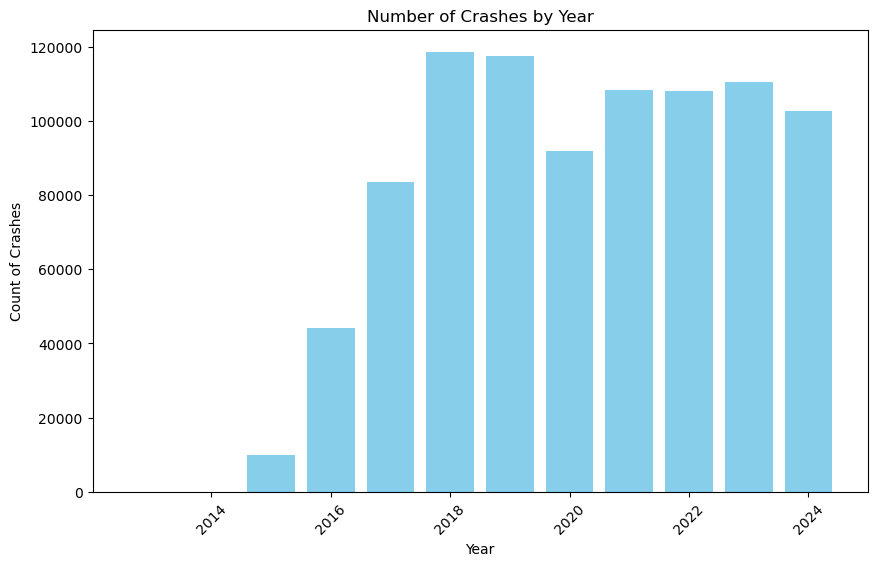

In [49]:
import matplotlib.pyplot as plt
# Group by 'YEAR' and count the occurrences
year_counts = data.groupBy('YEAR').count().orderBy('YEAR')

# Collect the results as a Pandas DataFrame for plotting
year_counts_pd = year_counts.toPandas()

# Plotting the data
plt.figure(figsize=(10,6))
plt.bar(year_counts_pd['YEAR'], year_counts_pd['count'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Count of Crashes')
plt.title('Number of Crashes by Year')
plt.xticks(rotation=45)
plt.show()


In [50]:
from pyspark.sql.functions import col

# Filter data where YEAR >= 2017
data = data.filter(col('YEAR') >= 2017)


In [51]:
from pyspark.sql.functions import col

# Group by the 'YEAR' column and count the occurrences
year_counts = data.groupBy('YEAR').count().orderBy('count', ascending=False)

# Show the result
year_counts.show()


+----+------+
|YEAR| count|
+----+------+
|2018|118729|
|2019|117497|
|2023|110483|
|2021|108516|
|2022|108114|
|2024|102773|
|2020| 91858|
|2017| 83640|
+----+------+



In [52]:
# Filter data for fatal accidents and get summary statistics
fatal_data = data.filter(col('MOST_SEVERE_INJURY') == 'FATAL')

# Get summary statistics
fatal_data.describe().show()


+-------+----------------------+--------------------+-----------------+------------------+----------------+---------------+--------------------+--------------------+-----------------+--------------------+------------+-----------------------+----------------------+----------------+------------------+------------------+------------------+-----------------------+---------------------------+-----------------------------+----------------------+------------------+-----------------+-----------------+------------------+-------------------+----------------+--------------------+------------------+------------------+
|summary|TRAFFIC_CONTROL_DEVICE|    DEVICE_CONDITION|WEATHER_CONDITION|LIGHTING_CONDITION|FIRST_CRASH_TYPE|TRAFFICWAY_TYPE|           ALIGNMENT|ROADWAY_SURFACE_COND|      ROAD_DEFECT|          CRASH_TYPE|      DAMAGE|PRIM_CONTRIBUTORY_CAUSE|SEC_CONTRIBUTORY_CAUSE|STREET_DIRECTION|MOST_SEVERE_INJURY|    INJURIES_TOTAL|    INJURIES_FATAL|INJURIES_INCAPACITATING|INJURIES_NON_INCAPACITAT

In [53]:
# Filter data for non-fatal accidents and get summary statistics
non_fatal_data = data.filter(col('MOST_SEVERE_INJURY') != 'FATAL')

# Get summary statistics
non_fatal_data.describe().show()


+-------+----------------------+--------------------+--------------------+------------------+----------------+---------------+--------------------+--------------------+-----------------+--------------------+------------+-----------------------+----------------------+----------------+--------------------+------------------+--------------+-----------------------+---------------------------+-----------------------------+----------------------+------------------+------------------+-----------------+-------------------+------------------+----------------+--------------------+-------------------+-----------------+
|summary|TRAFFIC_CONTROL_DEVICE|    DEVICE_CONDITION|   WEATHER_CONDITION|LIGHTING_CONDITION|FIRST_CRASH_TYPE|TRAFFICWAY_TYPE|           ALIGNMENT|ROADWAY_SURFACE_COND|      ROAD_DEFECT|          CRASH_TYPE|      DAMAGE|PRIM_CONTRIBUTORY_CAUSE|SEC_CONTRIBUTORY_CAUSE|STREET_DIRECTION|  MOST_SEVERE_INJURY|    INJURIES_TOTAL|INJURIES_FATAL|INJURIES_INCAPACITATING|INJURIES_NON_INCAPACI

In [54]:
from pyspark.sql.functions import col

# Filter data for fatal accidents and group by 'CRASH_HOUR', then count occurrences
fatal_hour = data.filter(col('MOST_SEVERE_INJURY') == 'FATAL') \
                 .groupBy('CRASH_HOUR') \
                 .count() \
                 .orderBy('count', ascending=False)

# Show the result
fatal_hour.show()


+----------+-----+
|CRASH_HOUR|count|
+----------+-----+
|        23|   70|
|         1|   69|
|         2|   63|
|        19|   59|
|        21|   58|
|        22|   56|
|        20|   55|
|         3|   52|
|         0|   45|
|        12|   45|
|         4|   39|
|        15|   38|
|        14|   35|
|        18|   34|
|        17|   33|
|        11|   32|
|         5|   29|
|         8|   27|
|        13|   26|
|        16|   25|
+----------+-----+
only showing top 20 rows



In [55]:
# Sort the fatal_hour DataFrame by the 'CRASH_HOUR' column in ascending order
fatal_hour_sorted = fatal_hour.orderBy('CRASH_HOUR')

# Display the sorted fatal_hour
fatal_hour_sorted.show()


+----------+-----+
|CRASH_HOUR|count|
+----------+-----+
|         0|   45|
|         1|   69|
|        10|   21|
|        11|   32|
|        12|   45|
|        13|   26|
|        14|   35|
|        15|   38|
|        16|   25|
|        17|   33|
|        18|   34|
|        19|   59|
|         2|   63|
|        20|   55|
|        21|   58|
|        22|   56|
|        23|   70|
|         3|   52|
|         4|   39|
|         5|   29|
+----------+-----+
only showing top 20 rows



In [56]:
from pyspark.sql.functions import avg

# Calculate the average of 'fatal_hour' values
average_fatal_hour = fatal_hour.agg(avg('CRASH_HOUR')).collect()[0][0]

# Display the average
print(average_fatal_hour)


11.5


Index(['CRASH_HOUR', 'count'], dtype='object')


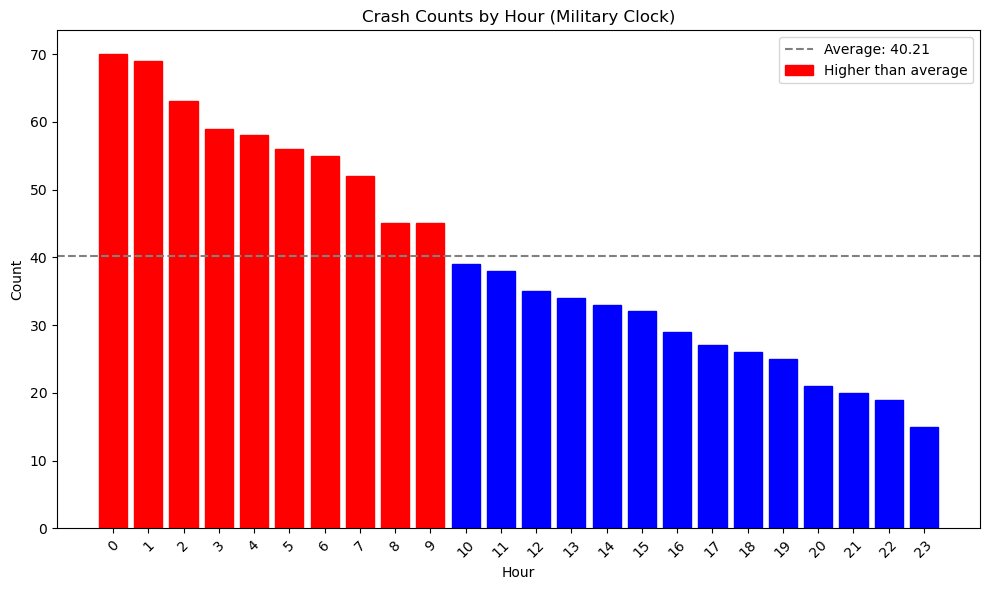

In [57]:
# Convert the 'fatal_hour' to a pandas DataFrame for plotting
fatal_hour_pd = fatal_hour.toPandas()

# Check the column names to ensure you're accessing the correct one
print(fatal_hour_pd.columns)

# Calculate the average of fatal accidents per hour
average = fatal_hour_pd['count'].mean()  # Replace 'count' with the correct column name if needed

# Fatal Accidents Distribution by Hour
plt.figure(figsize=(10, 6))
bars = plt.bar(fatal_hour_pd.index, fatal_hour_pd['count'], color='blue', label='Higher than average')

# If the count of accidents is higher than average, make the bar red; otherwise blue
for i in range(len(fatal_hour_pd)):
    if fatal_hour_pd['count'][i] > average:
        bars[i].set_color('red')
    else:
        bars[i].set_color('blue')

# For the line for average fatal accidents
plt.axhline(y=average, color='gray', linestyle='--', label=f'Average: {average:.2f}')
plt.legend()

plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Crash Counts by Hour (Military Clock)')
plt.xticks(range(24))
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [58]:
from pyspark.sql import functions as F

# Count occurrences of each hour
hour = data.groupBy('CRASH_HOUR').count()

# Sort by hour in ascending order
hour = hour.orderBy('CRASH_HOUR')

# Show the result
hour.show()


+----------+-----+
|CRASH_HOUR|count|
+----------+-----+
|         0|18692|
|         1|15904|
|        10|38306|
|        11|42705|
|        12|49355|
|        13|50553|
|        14|55813|
|        15|64812|
|        16|64325|
|        17|62392|
|        18|51492|
|        19|38170|
|         2|13543|
|        20|30939|
|        21|27734|
|        22|25511|
|        23|22152|
|         3|11178|
|         4| 9861|
|         5|11686|
+----------+-----+
only showing top 20 rows



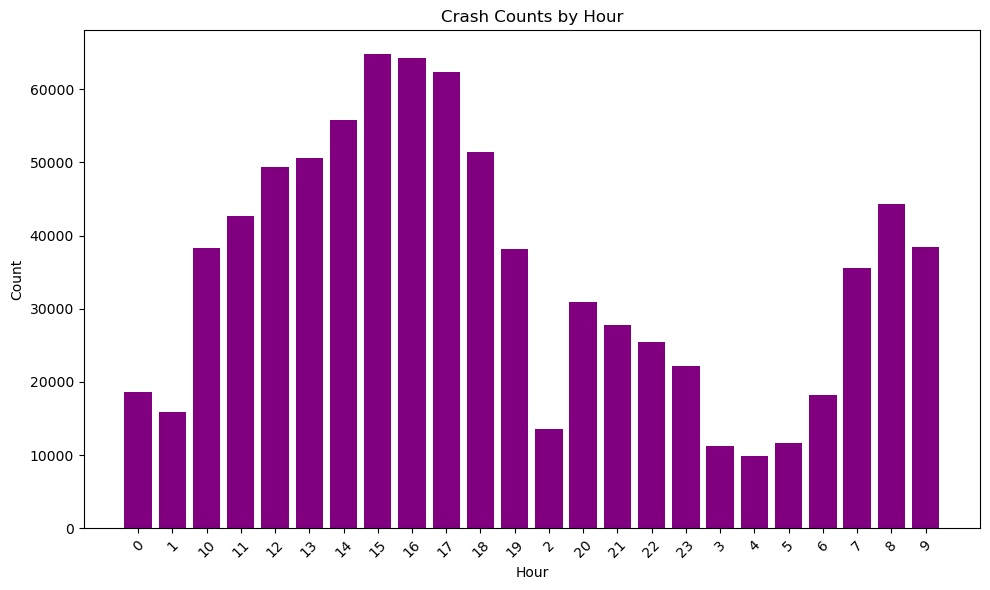

In [59]:
import matplotlib.pyplot as plt

# Convert the PySpark DataFrame into a Pandas DataFrame to work with matplotlib
hour_pd = hour.toPandas()

# Sort the data by 'CRASH_HOUR' to ensure it's in ascending order
hour_pd = hour_pd.sort_values(by='CRASH_HOUR')

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(hour_pd['CRASH_HOUR'], hour_pd['count'], color='purple')

plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Crash Counts by Hour')
plt.xticks(range(24), rotation=45)
plt.tight_layout()

plt.show()


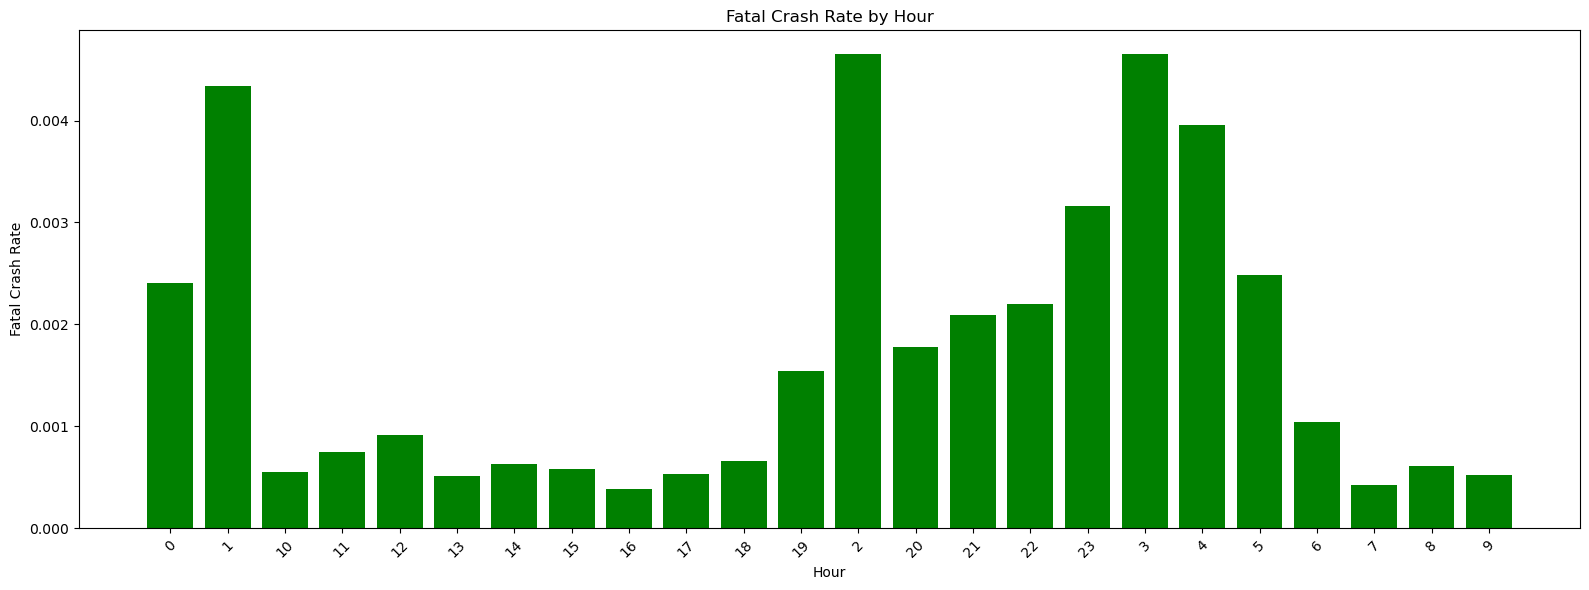

In [60]:
# Import necessary libraries
import matplotlib.pyplot as plt
from pyspark.sql import functions as F

# Step 1: Calculate fatal accidents by hour (FATAL accidents)
fatal_hour = data.filter(data['MOST_SEVERE_INJURY'] == 'FATAL') \
                 .groupBy('CRASH_HOUR') \
                 .count() \
                 .withColumnRenamed('count', 'fatal_count')

# Step 2: Calculate total accidents by hour (all accidents)
hour = data.groupBy('CRASH_HOUR') \
           .count() \
           .withColumnRenamed('count', 'total_count')

# Step 3: Join the fatal accidents count with the total accidents count by hour
hourly_data = fatal_hour.join(hour, on='CRASH_HOUR', how='outer').fillna(0)

# Step 4: Calculate the fatal accident ratio (Fatal Accidents / Total Accidents)
hourly_data = hourly_data.withColumn('fatal_ratio', F.col('fatal_count') / F.col('total_count'))

# Convert the result to a Pandas DataFrame for easy plotting
hourly_data_pd = hourly_data.toPandas()

# Step 5: Plot the Fatal Accident Ratio by Hour
plt.figure(figsize=(16, 6))
plt.bar(hourly_data_pd['CRASH_HOUR'], hourly_data_pd['fatal_ratio'], color='green')
plt.xlabel('Hour')
plt.ylabel('Fatal Crash Rate')
plt.title('Fatal Crash Rate by Hour')
plt.xticks(range(24), rotation=45)
plt.tight_layout()
plt.show()


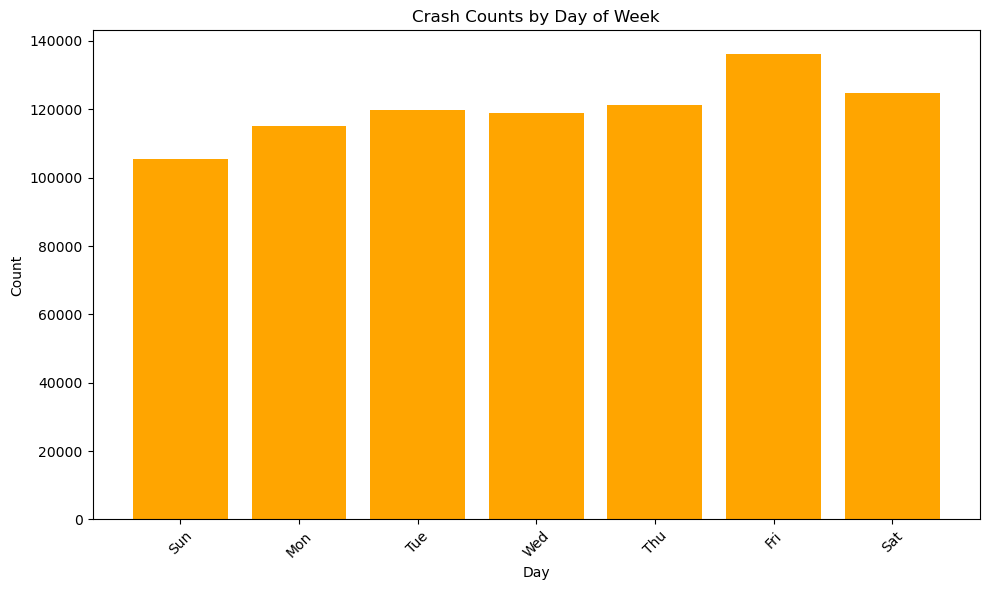

In [85]:
# Import necessary libraries
import matplotlib.pyplot as plt
from pyspark.sql import functions as F

# Step 1: Group the data by day of the week and count the accidents
day_dist = data.groupBy('CRASH_DAY_OF_WEEK') \
               .count() \
               .withColumnRenamed('count', 'accident_count')

# Step 2: Sort the data by 'CRASH_DAY_OF_WEEK'
day_dist = day_dist.orderBy('CRASH_DAY_OF_WEEK')

# Step 3: Convert to Pandas DataFrame for easier plotting
day_dist_pd = day_dist.toPandas()

# Step 4: Set the days of the week for the x-axis labels
days = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
tick_positions = list(range(0, 7))

# Step 5: Plot the distribution
plt.figure(figsize=(10, 6))
plt.bar(day_dist_pd['CRASH_DAY_OF_WEEK'], day_dist_pd['accident_count'], color='orange')
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Crash Counts by Day of Week')
plt.xticks(tick_positions, days, rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


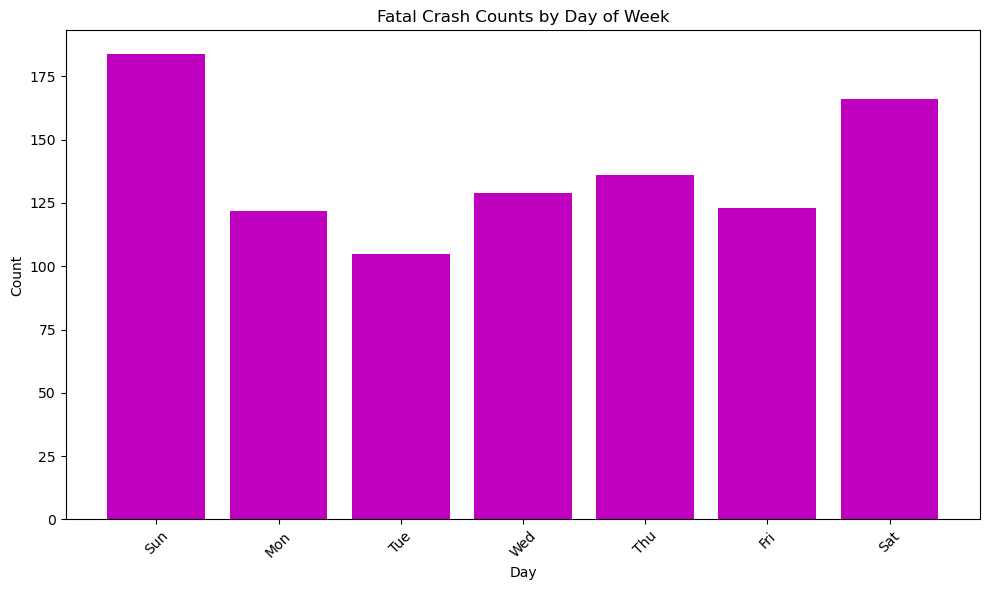

In [93]:
from pyspark.sql.functions import col
import matplotlib.pyplot as plt

# Filter for fatal accidents
fatal_data = data.filter(col('MOST_SEVERE_INJURY') == 'FATAL')

# Group by day of the week and count the number of fatal accidents
fatal_day = fatal_data.groupBy('CRASH_DAY_OF_WEEK').count()

# Sort by the day of the week
fatal_day = fatal_day.orderBy('CRASH_DAY_OF_WEEK')

# Collect the data to a Pandas DataFrame for plotting
fatal_day_pd = fatal_day.toPandas()

# Prepare the days and tick positions for plotting
days = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
tick_positions = list(range(len(days)))

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(fatal_day_pd['CRASH_DAY_OF_WEEK'], fatal_day_pd['count'], color='m')
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Fatal Crash Counts by Day of Week')
plt.xticks(tick_positions, days, rotation=45)
plt.tight_layout()
plt.show()


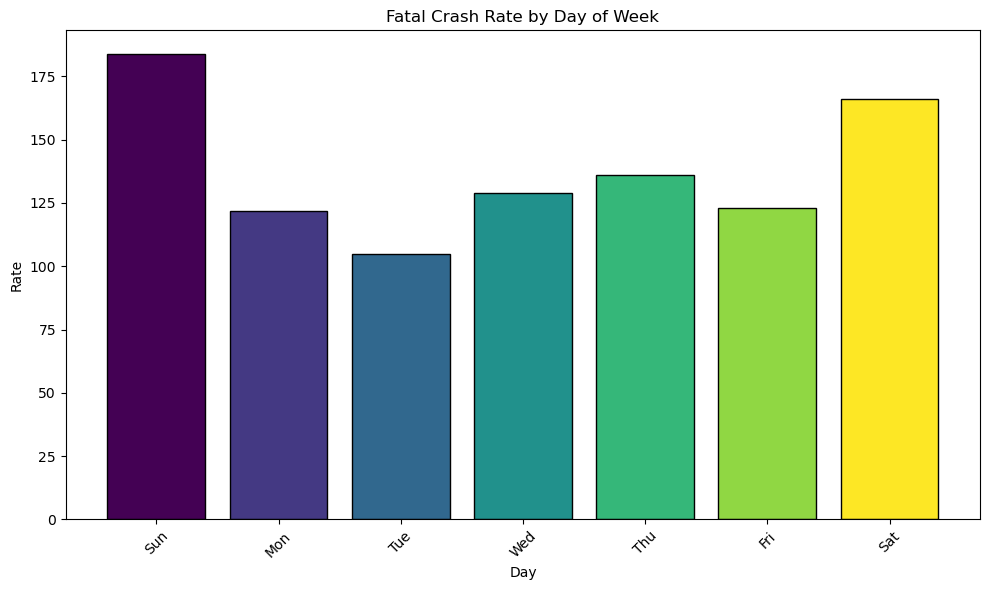

In [92]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from pyspark.sql.functions import col

# Calculate the fatal crash rate per day (fatal_day_rate = fatal_day / day_dist + fatal_day)
# First, join fatal_day and day_dist
day_dist_df = data.groupBy('CRASH_DAY_OF_WEEK').count().orderBy('CRASH_DAY_OF_WEEK')

# Collect both to Pandas DataFrames for easier manipulation
fatal_day_pd = fatal_day.toPandas()
day_dist_pd = day_dist_df.toPandas()

# Calculate fatal crash rate
# Join on the 'CRASH_DAY_OF_WEEK' column and compute the ratio
fatal_day_rate = fatal_day_pd.set_index('CRASH_DAY_OF_WEEK')['count'] / day_dist_pd.set_index('CRASH_DAY_OF_WEEK')['count'] + fatal_day_pd.set_index('CRASH_DAY_OF_WEEK')['count']

# Prepare the days and tick positions for plotting
days = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
tick_positions = list(range(len(days)))

# Create a colormap
cmap = plt.get_cmap('viridis')

# Normalize the CRASH_DAY_OF_WEEK to the range [0, 1]
norm = mcolors.Normalize(vmin=0, vmax=len(days) - 1)

# Apply the colormap to each bar
colors = cmap(norm(list(range(len(days)))))

# Plotting the fatal crash rate
plt.figure(figsize=(10, 6))
bars = plt.bar(fatal_day_rate.index, fatal_day_rate, color=colors, edgecolor='black')
plt.xlabel('Day')
plt.ylabel('Rate')
plt.title('Fatal Crash Rate by Day of Week')
plt.xticks(tick_positions, days, rotation=45)
plt.tight_layout()
plt.show()



In [64]:
from pyspark.sql import functions as F

# Define categorical columns
categorical_columns = [
    'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
    'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
    'ROAD_DEFECT', 'CRASH_TYPE', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE',
    'SEC_CONTRIBUTORY_CAUSE', 'STREET_DIRECTION', 'MOST_SEVERE_INJURY', 'SPEED_LIMIT_CATEGORY',
    'NUM_UNITS_CATEGORY', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH'
]

# Loop through categorical columns and check value counts for fatal crashes
for col in categorical_columns:
    fatal_data = data.filter(data['MOST_SEVERE_INJURY'] == 'FATAL')
    value_counts = fatal_data.groupBy(col).count().orderBy(F.desc('count'))  # Get value counts
    value_counts.show()  # Display the results


+----------------------+-----+
|TRAFFIC_CONTROL_DEVICE|count|
+----------------------+-----+
|           NO CONTROLS|  543|
|        TRAFFIC SIGNAL|  300|
|     STOP SIGN/FLASHER|   76|
|               UNKNOWN|   23|
|                 OTHER|   10|
|  RAILROAD CROSSING...|    3|
|  PEDESTRIAN CROSSI...|    3|
|    OTHER WARNING SIGN|    2|
|                 YIELD|    2|
|        POLICE/FLAGMAN|    1|
|       OTHER REG. SIGN|    1|
|           SCHOOL ZONE|    1|
+----------------------+-----+

+--------------------+-----+
|    DEVICE_CONDITION|count|
+--------------------+-----+
|         NO CONTROLS|  529|
|FUNCTIONING PROPERLY|  376|
|             UNKNOWN|   47|
|               OTHER|    6|
|FUNCTIONING IMPRO...|    4|
|     NOT FUNCTIONING|    3|
+--------------------+-----+

+--------------------+-----+
|   WEATHER_CONDITION|count|
+--------------------+-----+
|               CLEAR|  796|
|                RAIN|   96|
|                SNOW|   24|
|     CLOUDY/OVERCAST|   21|
|        

Fatal values for WEATHER_CONDITION:
        WEATHER_CONDITION  count
0                   CLEAR    796
1                    RAIN     96
2                    SNOW     24
3         CLOUDY/OVERCAST     21
4                 UNKNOWN     18
5                   OTHER      3
6          FOG/SMOKE/HAZE      2
7   FREEZING RAIN/DRIZZLE      2
8            BLOWING SNOW      2
9  SEVERE CROSS WIND GATE      1


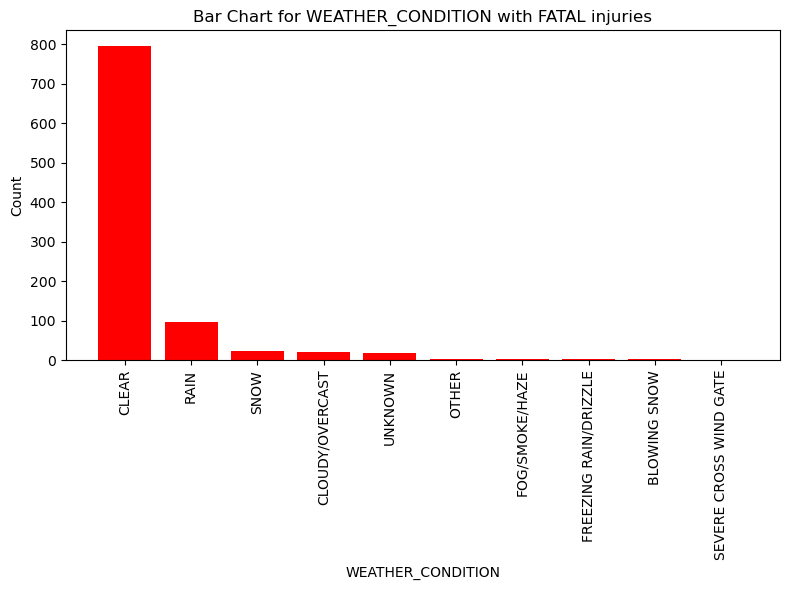

Non-Fatal values for WEATHER_CONDITION:
           WEATHER_CONDITION   count
0                      CLEAR  660882
1                       RAIN   73066
2                    UNKNOWN   47625
3                       SNOW   27079
4            CLOUDY/OVERCAST   24798
5                      OTHER    2614
6      FREEZING RAIN/DRIZZLE    1775
7             FOG/SMOKE/HAZE    1283
8                 SLEET/HAIL     956
9               BLOWING SNOW     446
10    SEVERE CROSS WIND GATE     114
11  BLOWING SAND, SOIL, DIRT       7


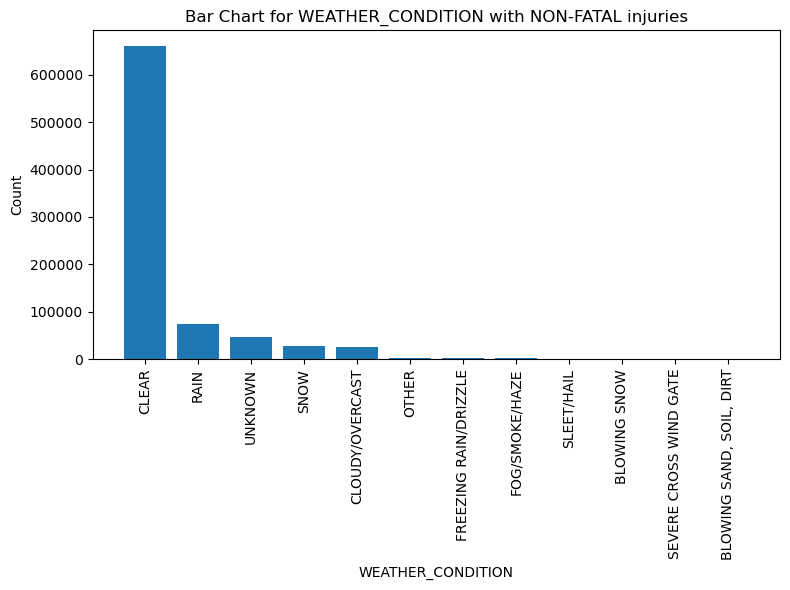

In [98]:
import matplotlib.pyplot as plt
from pyspark.sql import functions as F

def double_bar(column):
    # Loop through fatal and non-fatal crashes
    for injury_type in ['FATAL', 'NON-FATAL']:
        if injury_type == 'NON-FATAL':
            # Filter non-fatal crashes (excluding FATAL) and get value counts
            values = data.filter(data['MOST_SEVERE_INJURY'] != 'FATAL') \
                         .groupBy(column) \
                         .count() \
                         .orderBy(F.desc('count')) \
                         .toPandas()  # Convert to Pandas for plotting
            print(f"Non-Fatal values for {column}:")
            print(values)  # Debugging print
            if not values.empty:
                plt.figure(figsize=(8, 6))
                plt.bar(values[column], values['count'])
                plt.title(f'Bar Chart for {column} with NON-FATAL injuries')
                plt.xlabel(column)
                plt.ylabel('Count')
                plt.xticks(rotation=90)
                plt.tight_layout()
                plt.show()
            else:
                print("No data found for Non-Fatal crashes")
        
        elif injury_type == 'FATAL':
            # Filter fatal crashes and get value counts
            values = data.filter(data['MOST_SEVERE_INJURY'] == 'FATAL') \
                         .groupBy(column) \
                         .count() \
                         .orderBy(F.desc('count')) \
                         .toPandas()  # Convert to Pandas for plotting
            print(f"Fatal values for {column}:")
            print(values)  # Debugging print
            if not values.empty:
                plt.figure(figsize=(8, 6))
                plt.bar(values[column], values['count'], color='red')
                plt.title(f'Bar Chart for {column} with FATAL injuries')
                plt.xlabel(column)
                plt.ylabel('Count')
                plt.xticks(rotation=90)
                plt.tight_layout()
                plt.show()
            else:
                print("No data found for Fatal crashes")
double_bar('WEATHER_CONDITION')


Fatal values for LIGHTING_CONDITION:
       LIGHTING_CONDITION  count
0  DARKNESS, LIGHTED ROAD    498
1                DAYLIGHT    352
2                DARKNESS     63
3                    DUSK     30
4                    DAWN     15
5                 UNKNOWN      7


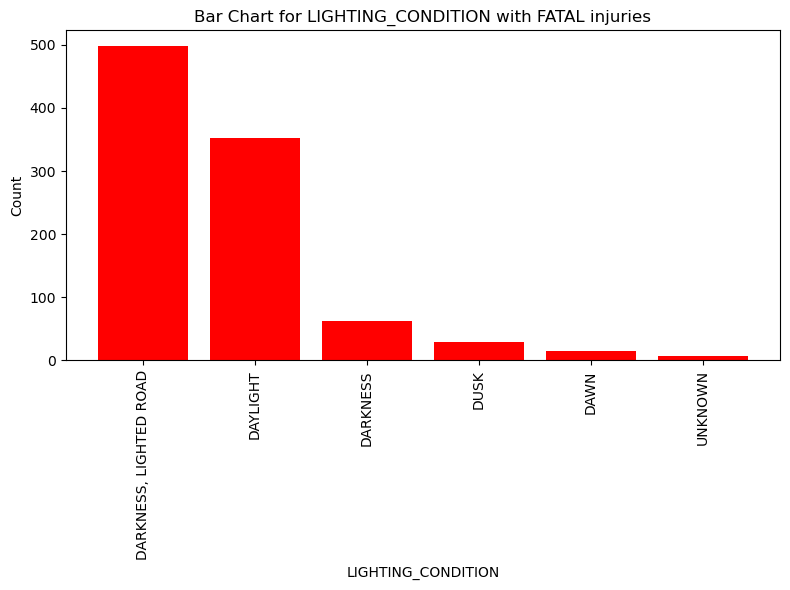

Non-Fatal values for LIGHTING_CONDITION:
       LIGHTING_CONDITION   count
0                DAYLIGHT  539665
1  DARKNESS, LIGHTED ROAD  184773
2                 UNKNOWN   39353
3                DARKNESS   39009
4                    DUSK   23734
5                    DAWN   14111


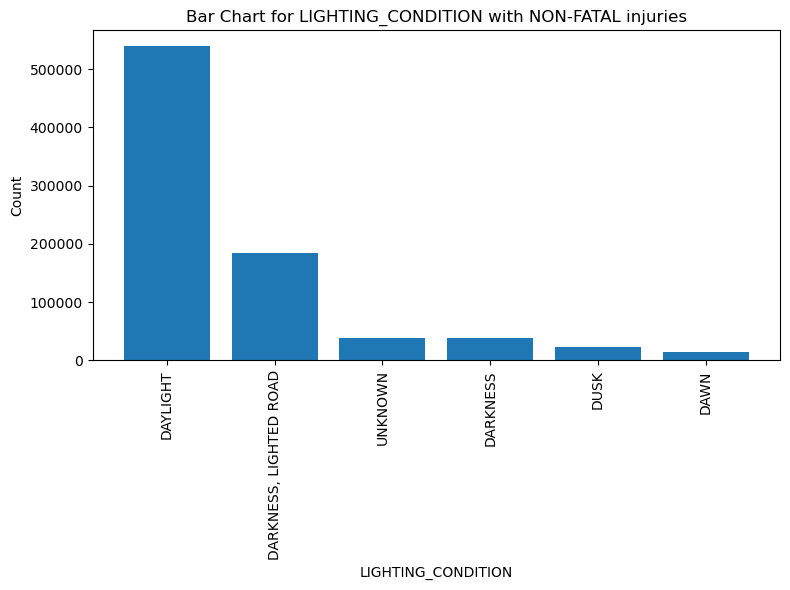

In [66]:
double_bar('LIGHTING_CONDITION')

Fatal values for FIRST_CRASH_TYPE:
                FIRST_CRASH_TYPE  count
0                     PEDESTRIAN    251
1                   FIXED OBJECT    226
2                          ANGLE    112
3           PARKED MOTOR VEHICLE    104
4                        TURNING     82
5                        HEAD ON     44
6                       REAR END     43
7                   PEDALCYCLIST     34
8       SIDESWIPE SAME DIRECTION     23
9                   OTHER OBJECT     21
10  SIDESWIPE OPPOSITE DIRECTION      6
11                        ANIMAL      6
12            OTHER NONCOLLISION      4
13                    OVERTURNED      4
14                 REAR TO FRONT      3
15                         TRAIN      2


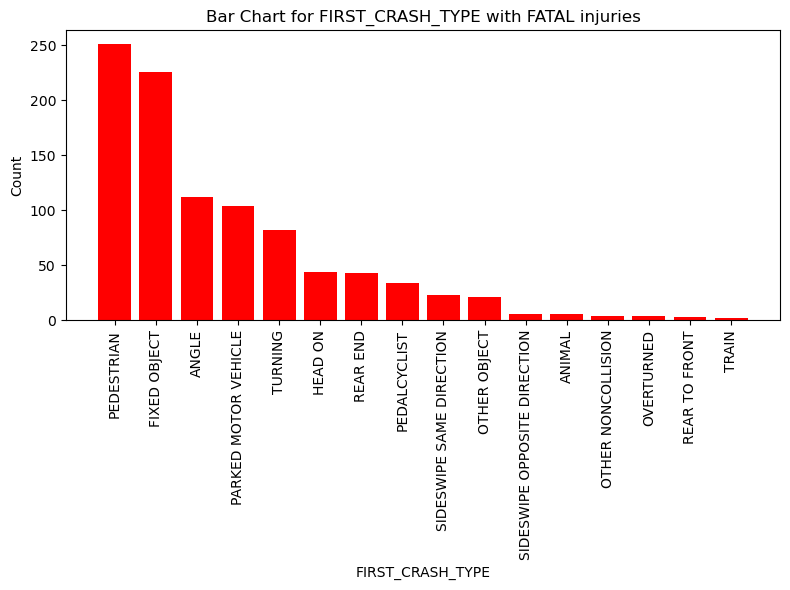

Non-Fatal values for FIRST_CRASH_TYPE:
                FIRST_CRASH_TYPE   count
0           PARKED MOTOR VEHICLE  194876
1                       REAR END  182844
2       SIDESWIPE SAME DIRECTION  127614
3                        TURNING  122164
4                          ANGLE   92081
5                   FIXED OBJECT   39582
6                     PEDESTRIAN   20456
7                   PEDALCYCLIST   13776
8   SIDESWIPE OPPOSITE DIRECTION   11644
9                  REAR TO FRONT    9185
10                  OTHER OBJECT    8326
11                       HEAD ON    7121
12                  REAR TO SIDE    5473
13            OTHER NONCOLLISION    2442
14                  REAR TO REAR    1895
15                        ANIMAL     613
16                    OVERTURNED     512
17                         TRAIN      41


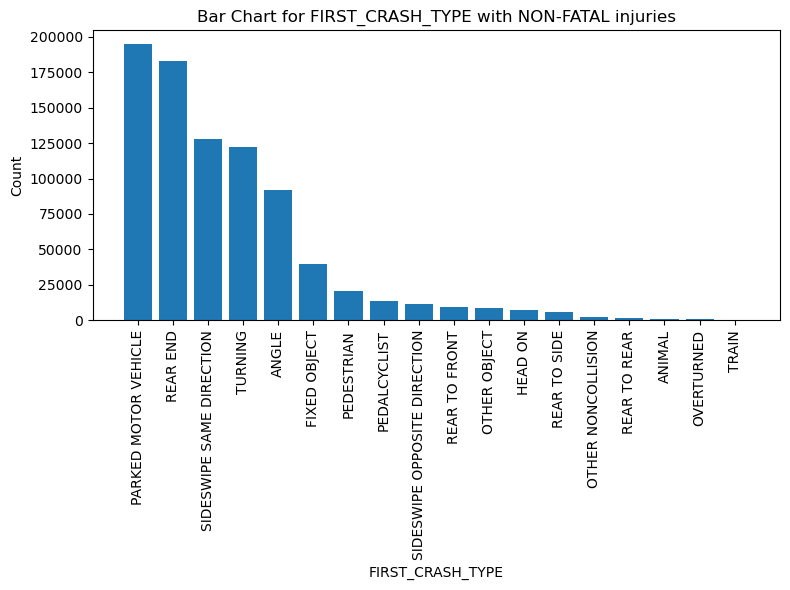

In [67]:
double_bar('FIRST_CRASH_TYPE')

Fatal values for TRAFFICWAY_TYPE:
                    TRAFFICWAY_TYPE  count
0                       NOT DIVIDED    357
1   DIVIDED - W/MEDIAN (NOT RAISED)    183
2        DIVIDED - W/MEDIAN BARRIER    125
3                          FOUR WAY    109
4                           ONE-WAY     89
5                             OTHER     24
6                    T-INTERSECTION     23
7                  CENTER TURN LANE     14
8                             ALLEY     12
9                       PARKING LOT     11
10        UNKNOWN INTERSECTION TYPE      5
11                          UNKNOWN      3
12                         DRIVEWAY      2
13              FIVE POINT, OR MORE      2
14                     NOT REPORTED      2
15                             RAMP      1
16                   Y-INTERSECTION      1
17                    TRAFFIC ROUTE      1
18                   L-INTERSECTION      1


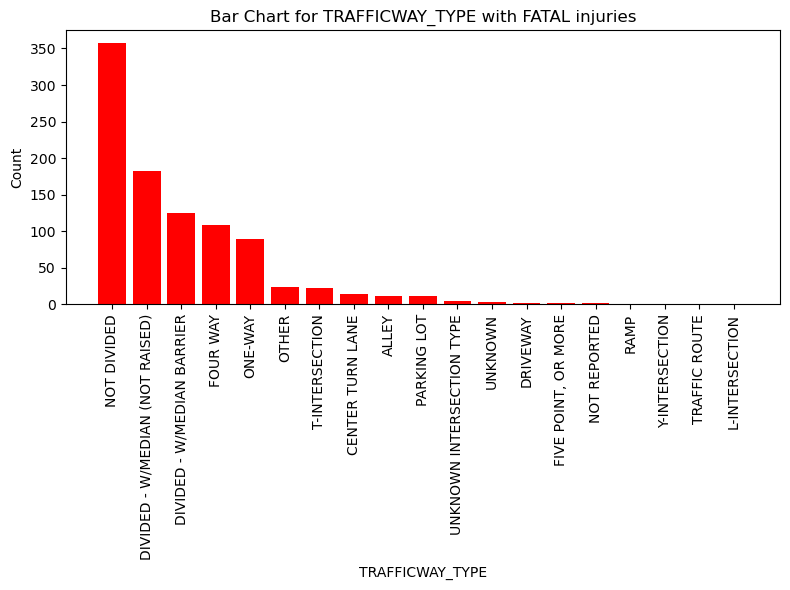

Non-Fatal values for TRAFFICWAY_TYPE:
                    TRAFFICWAY_TYPE   count
0                       NOT DIVIDED  362536
1   DIVIDED - W/MEDIAN (NOT RAISED)  130699
2                           ONE-WAY  105375
3                          FOUR WAY   61937
4                       PARKING LOT   55770
5        DIVIDED - W/MEDIAN BARRIER   47156
6                             OTHER   22331
7                             ALLEY   13919
8                    T-INTERSECTION   12279
9                           UNKNOWN    9594
10                 CENTER TURN LANE    5946
11        UNKNOWN INTERSECTION TYPE    2740
12                         DRIVEWAY    2691
13                             RAMP    2659
14              FIVE POINT, OR MORE    1368
15                   Y-INTERSECTION    1335
16                    TRAFFIC ROUTE    1147
17                     NOT REPORTED     676
18                       ROUNDABOUT     303
19                   L-INTERSECTION     184


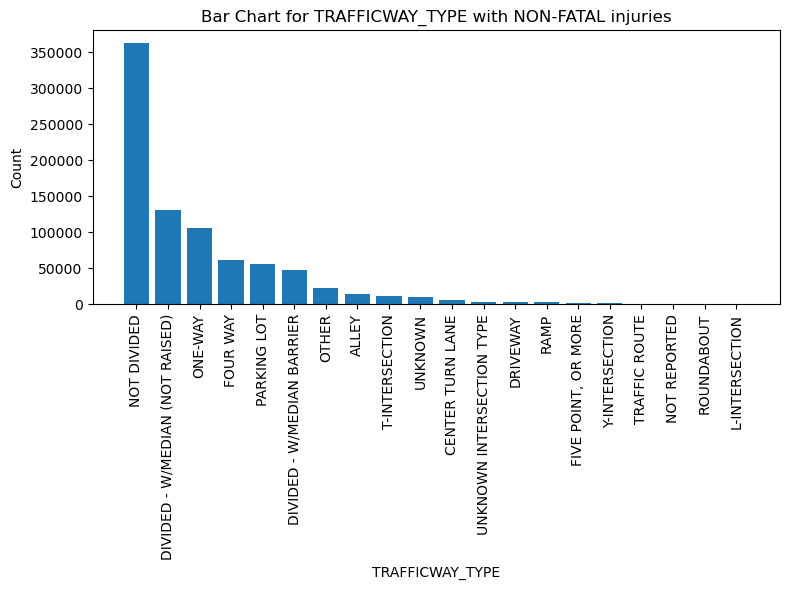

In [68]:
double_bar('TRAFFICWAY_TYPE')

Fatal values for ROADWAY_SURFACE_COND:
  ROADWAY_SURFACE_COND  count
0                  DRY    760
1                  WET    135
2              UNKNOWN     34
3        SNOW OR SLUSH     23
4                  ICE      8
5                OTHER      5


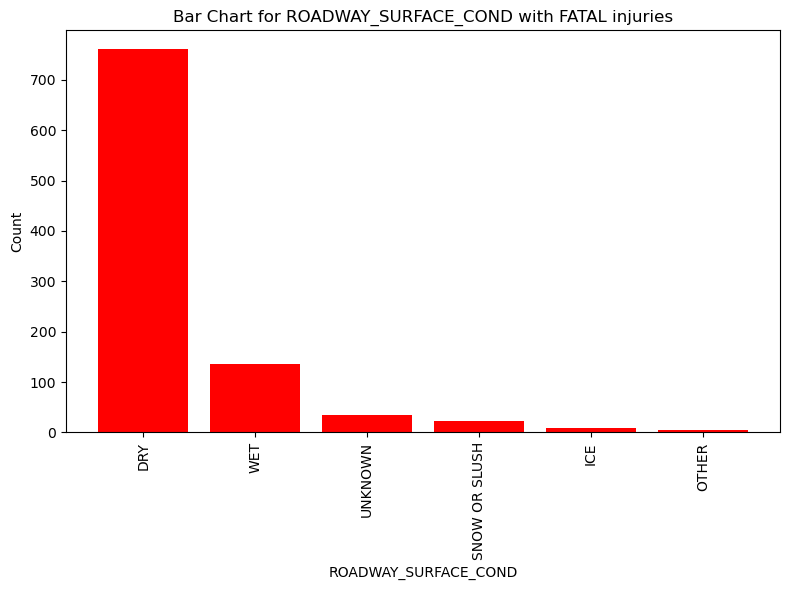

Non-Fatal values for ROADWAY_SURFACE_COND:
  ROADWAY_SURFACE_COND   count
0                  DRY  621550
1                  WET  110185
2              UNKNOWN   74514
3        SNOW OR SLUSH   26669
4                  ICE    5280
5                OTHER    2144
6      SAND, MUD, DIRT     303


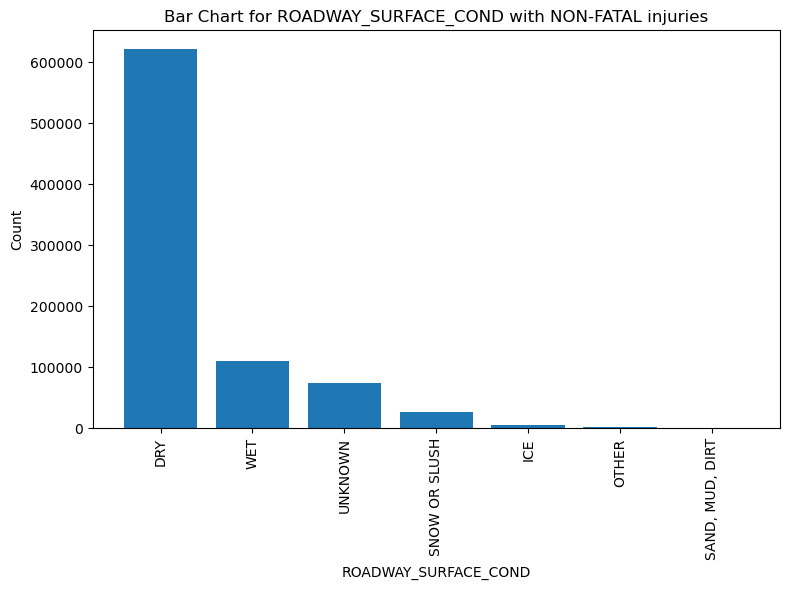

In [69]:
double_bar('ROADWAY_SURFACE_COND')

Fatal values for CRASH_TYPE:
                         CRASH_TYPE  count
0  INJURY AND / OR TOW DUE TO CRASH    965


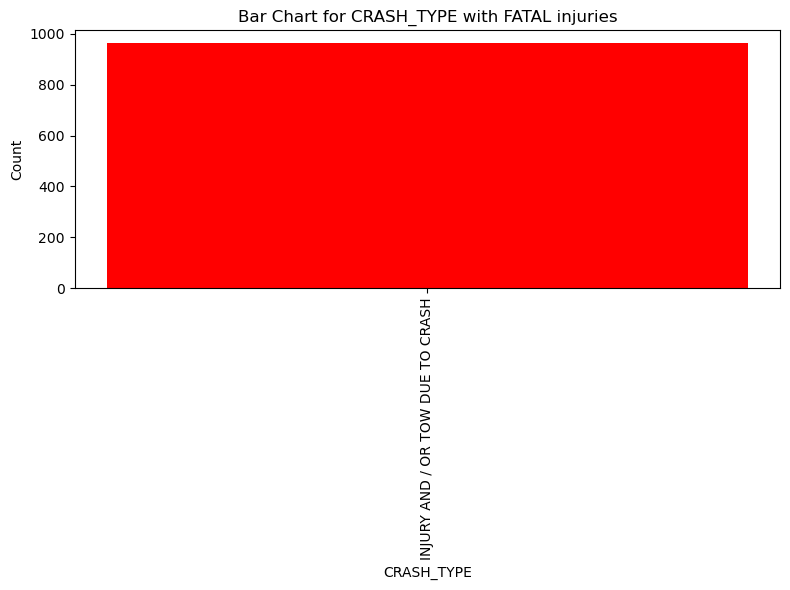

Non-Fatal values for CRASH_TYPE:
                         CRASH_TYPE   count
0            NO INJURY / DRIVE AWAY  605956
1  INJURY AND / OR TOW DUE TO CRASH  234689


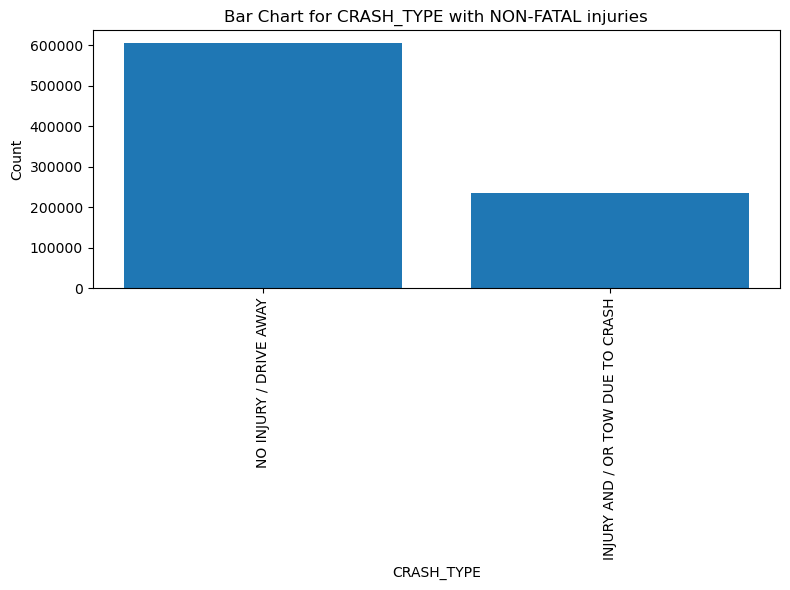

In [70]:
double_bar( 'CRASH_TYPE')

Fatal values for DAMAGE:
          DAMAGE  count
0    OVER $1,500    824
1   $500 OR LESS     84
2  $501 - $1,500     57


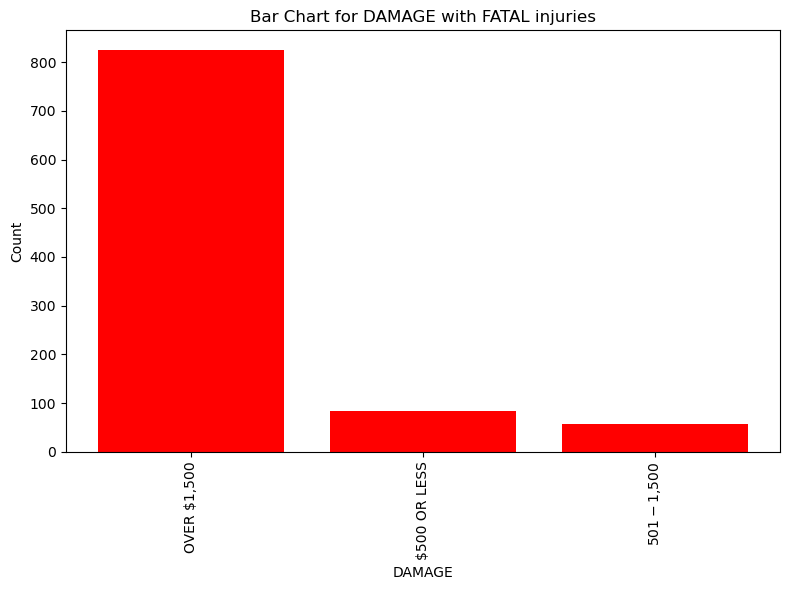

Non-Fatal values for DAMAGE:
          DAMAGE   count
0    OVER $1,500  534805
1  $501 - $1,500  212148
2   $500 OR LESS   93692


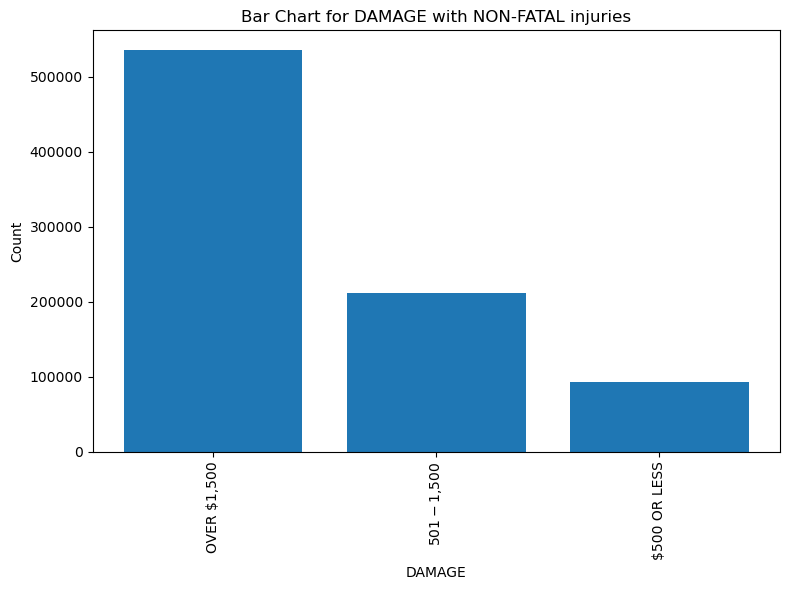

In [71]:
double_bar('DAMAGE')

Fatal values for PRIM_CONTRIBUTORY_CAUSE:
                              PRIM_CONTRIBUTORY_CAUSE  count
0                                 UNABLE TO DETERMINE    335
1                       FAILING TO YIELD RIGHT-OF-WAY     87
2              FAILING TO REDUCE SPEED TO AVOID CRASH     86
3                        PHYSICAL CONDITION OF DRIVER     82
4                        DISREGARDING TRAFFIC SIGNALS     77
5                                      NOT APPLICABLE     76
6   OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELE...     44
7                     DRIVING ON WRONG SIDE/WRONG WAY     22
8                    EXCEEDING AUTHORIZED SPEED LIMIT     21
9   UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN...     21
10                        IMPROPER OVERTAKING/PASSING     17
11                                IMPROPER LANE USAGE     13
12                             DISREGARDING STOP SIGN     13
13                 DISTRACTION - FROM OUTSIDE VEHICLE      9
14                         IMPROPER TURNING

C:\Users\yoges\AppData\Local\Temp\ipykernel_3680\358863282.py:44: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


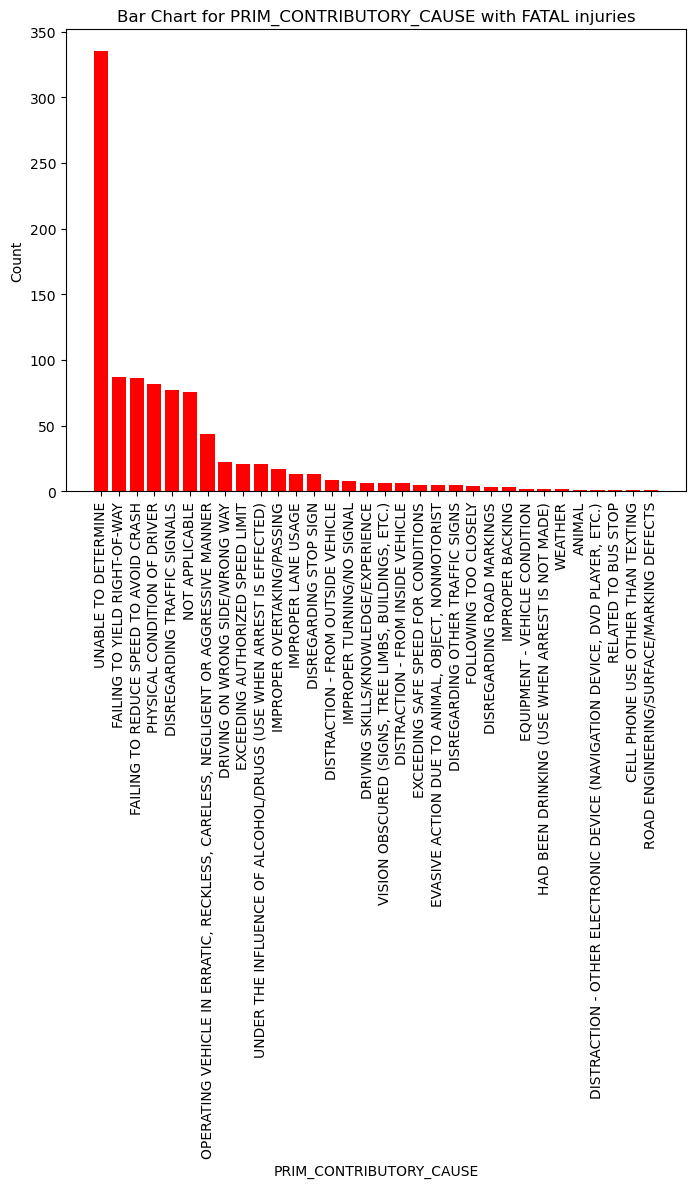

Non-Fatal values for PRIM_CONTRIBUTORY_CAUSE:
                              PRIM_CONTRIBUTORY_CAUSE   count
0                                 UNABLE TO DETERMINE  329112
1                       FAILING TO YIELD RIGHT-OF-WAY   93842
2                               FOLLOWING TOO CLOSELY   79574
3                                      NOT APPLICABLE   43854
4                         IMPROPER OVERTAKING/PASSING   41766
5              FAILING TO REDUCE SPEED TO AVOID CRASH   36103
6                                    IMPROPER BACKING   31728
7                                 IMPROPER LANE USAGE   29628
8                 DRIVING SKILLS/KNOWLEDGE/EXPERIENCE   28363
9                          IMPROPER TURNING/NO SIGNAL   28258
10                       DISREGARDING TRAFFIC SIGNALS   16952
11                                            WEATHER   12060
12  OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELE...   10803
13                             DISREGARDING STOP SIGN    9126
14                  DIST

C:\Users\yoges\AppData\Local\Temp\ipykernel_3680\358863282.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


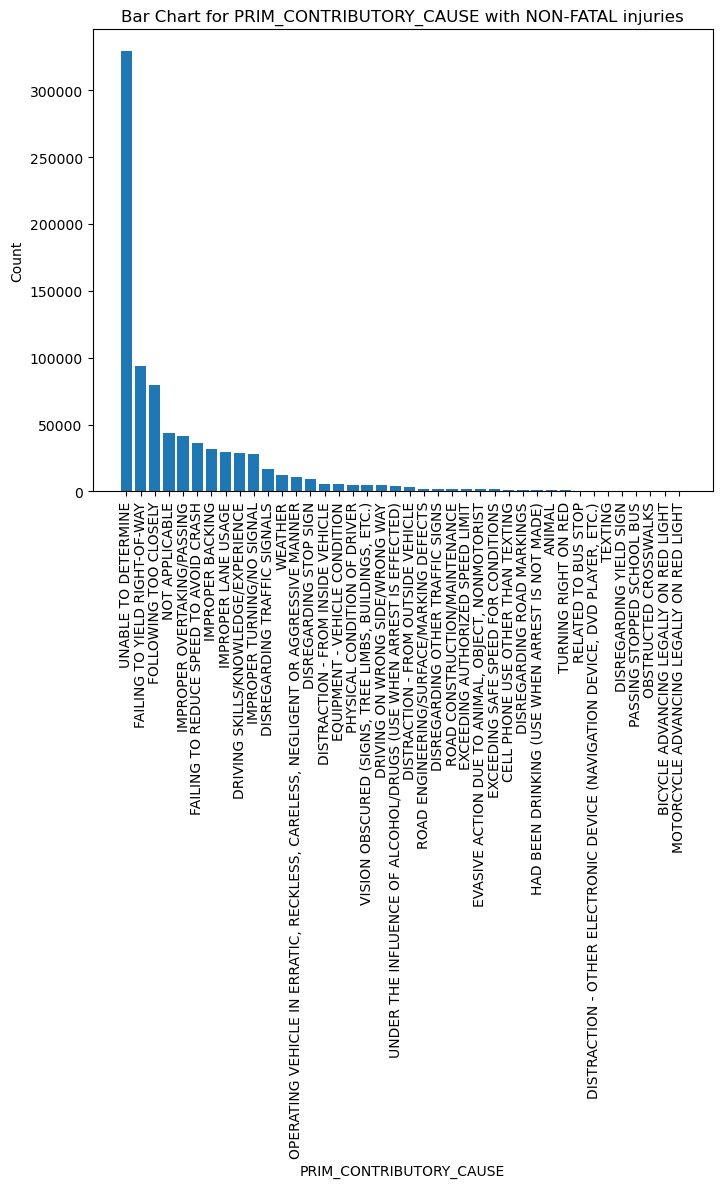

In [72]:
double_bar('PRIM_CONTRIBUTORY_CAUSE')

Fatal values for SEC_CONTRIBUTORY_CAUSE:
                               SEC_CONTRIBUTORY_CAUSE  count
0                                      NOT APPLICABLE    369
1                                 UNABLE TO DETERMINE    323
2              FAILING TO REDUCE SPEED TO AVOID CRASH     67
3                       FAILING TO YIELD RIGHT-OF-WAY     33
4   OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELE...     25
5                        PHYSICAL CONDITION OF DRIVER     23
6                 DRIVING SKILLS/KNOWLEDGE/EXPERIENCE     17
7                        DISREGARDING TRAFFIC SIGNALS     15
8                     DRIVING ON WRONG SIDE/WRONG WAY     10
9                    EXCEEDING AUTHORIZED SPEED LIMIT      8
10                                IMPROPER LANE USAGE      7
11                        IMPROPER OVERTAKING/PASSING      7
12  UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN...      7
13    HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)      6
14                 DISTRACTION - FROM OUTSID

C:\Users\yoges\AppData\Local\Temp\ipykernel_3680\358863282.py:44: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


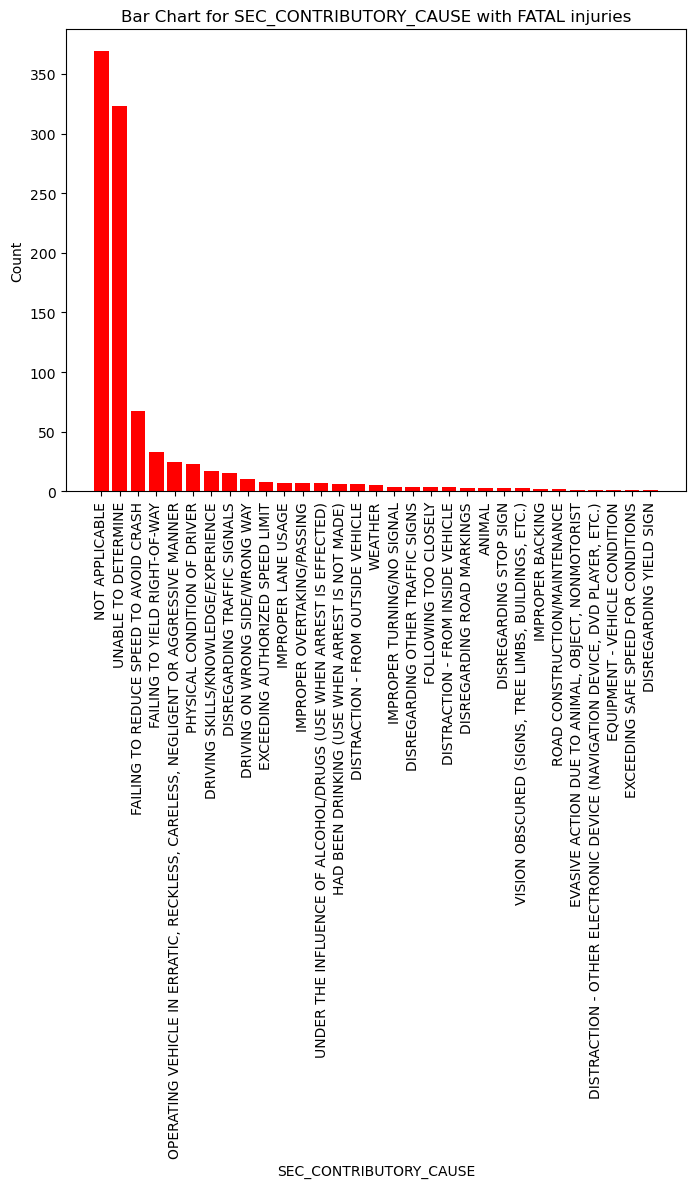

Non-Fatal values for SEC_CONTRIBUTORY_CAUSE:
                               SEC_CONTRIBUTORY_CAUSE   count
0                                      NOT APPLICABLE  347990
1                                 UNABLE TO DETERMINE  302053
2              FAILING TO REDUCE SPEED TO AVOID CRASH   31033
3                       FAILING TO YIELD RIGHT-OF-WAY   26981
4                 DRIVING SKILLS/KNOWLEDGE/EXPERIENCE   25986
5                               FOLLOWING TOO CLOSELY   21777
6                         IMPROPER OVERTAKING/PASSING   13113
7                                 IMPROPER LANE USAGE   11733
8                                             WEATHER    9241
9                          IMPROPER TURNING/NO SIGNAL    8809
10                                   IMPROPER BACKING    6577
11  OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELE...    5226
12                       DISREGARDING TRAFFIC SIGNALS    3478
13  VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...    2659
14                       

C:\Users\yoges\AppData\Local\Temp\ipykernel_3680\358863282.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


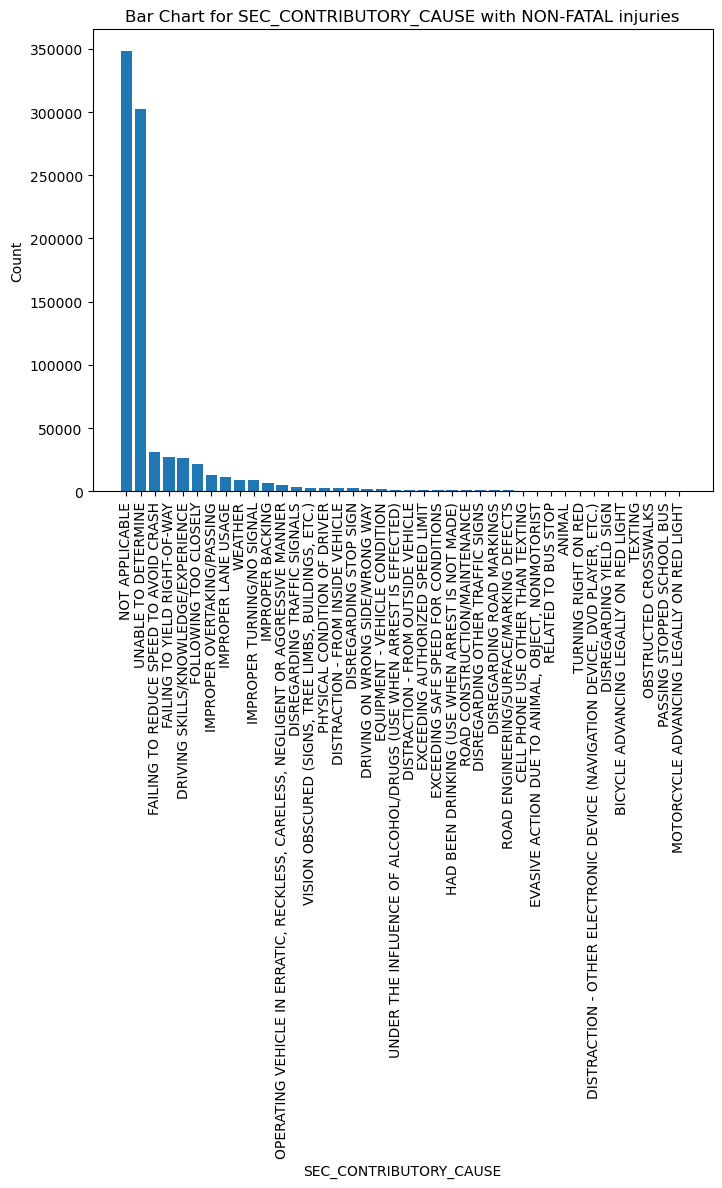

In [73]:
double_bar('SEC_CONTRIBUTORY_CAUSE')

Fatal values for SPEED_LIMIT_CATEGORY:
  SPEED_LIMIT_CATEGORY  count
0                15-30    799
1                30-45    133
2                 0-15     32
3             Above 45      1


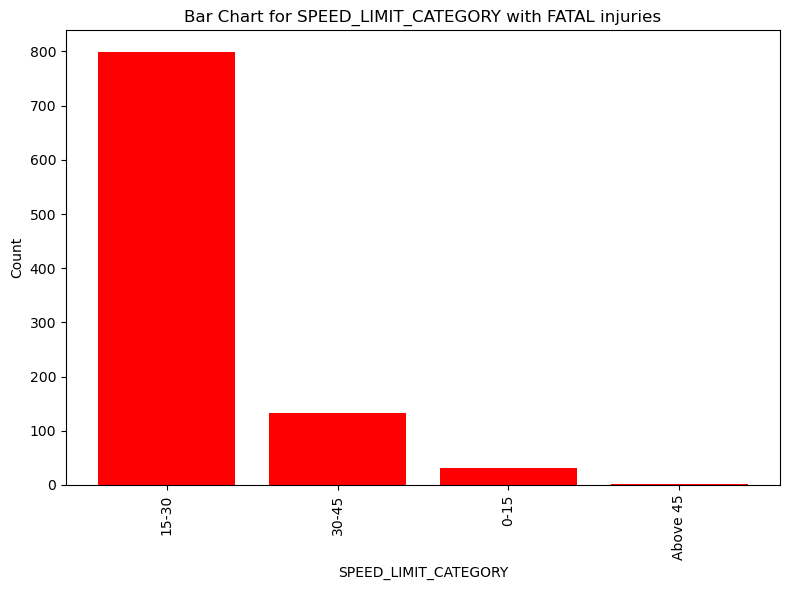

Non-Fatal values for SPEED_LIMIT_CATEGORY:
  SPEED_LIMIT_CATEGORY   count
0                15-30  709349
1                30-45   69827
2                 0-15   60318
3             Above 45    1151


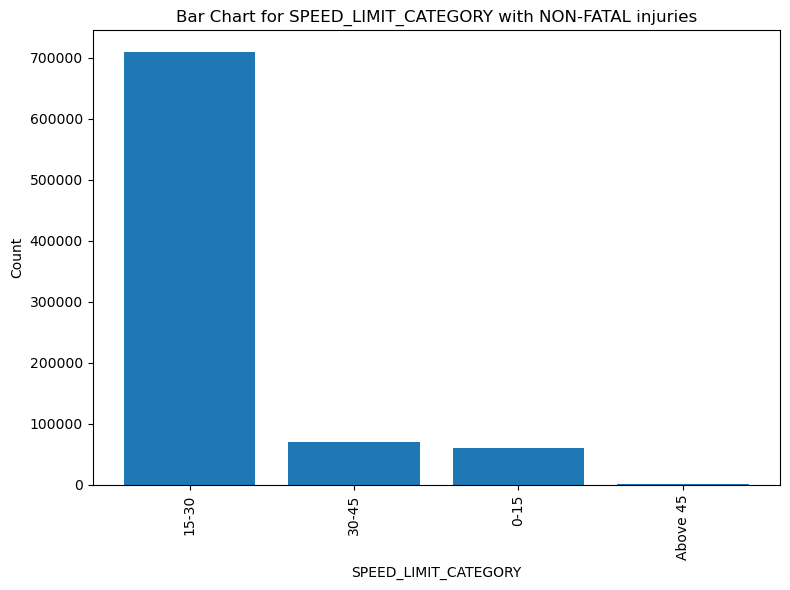

In [74]:
double_bar('SPEED_LIMIT_CATEGORY')

In [75]:
pip install --upgrade typing_extensions

Note: you may need to restart the kernel to use updated packages.


In [76]:
pip install --upgrade altair

In [77]:
import altair as alt
from pyspark.sql import functions as F

# Separate fatal and non-fatal accidents in PySpark
fatal_accidents = data.filter(data['MOST_SEVERE_INJURY'] == 'FATAL')
non_fatal_accidents = data.filter(data['MOST_SEVERE_INJURY'] != 'FATAL')

# Sample 5000 rows from non-fatal accidents
non_fatal_accidents_sampled = non_fatal_accidents.sample(False, 5000 / non_fatal_accidents.count(), seed=42)

# Convert PySpark DataFrames to Pandas for Altair
fatal_accidents_pd = fatal_accidents.select('LATITUDE', 'LONGITUDE', 'MOST_SEVERE_INJURY').toPandas()
non_fatal_accidents_sampled_pd = non_fatal_accidents_sampled.select('LATITUDE', 'LONGITUDE', 'MOST_SEVERE_INJURY').toPandas()

# Create a layer for fatal accidents
fatal_layer = alt.Chart(fatal_accidents_pd).mark_circle(size=10, opacity=0.6, color='red').encode(
    latitude='LATITUDE:Q',
    longitude='LONGITUDE:Q',
    tooltip=['LATITUDE', 'LONGITUDE', 'MOST_SEVERE_INJURY']
).properties(
    width=600,
    height=400
).project(
    type='mercator'
)

# Create a layer for non-fatal accidents
non_fatal_layer = alt.Chart(non_fatal_accidents_sampled_pd).mark_circle(size=10, opacity=0.4, color='blue').encode(
    latitude='LATITUDE:Q',
    longitude='LONGITUDE:Q',
    tooltip=['LATITUDE', 'LONGITUDE', 'MOST_SEVERE_INJURY']
).properties(
    width=600,
    height=400
).project(
    type='mercator'
)

# Overlay the layers to create a combined map
combined_map = (non_fatal_layer + fatal_layer).properties(
    title="Fatal and Non-Fatal Accidents"
)

# Make the map interactive
combined_map.interactive()


alt.LayerChart(...)

In [78]:
data.dtypes

[('CRASH_DATE', 'timestamp'),
 ('TRAFFIC_CONTROL_DEVICE', 'string'),
 ('DEVICE_CONDITION', 'string'),
 ('WEATHER_CONDITION', 'string'),
 ('LIGHTING_CONDITION', 'string'),
 ('FIRST_CRASH_TYPE', 'string'),
 ('TRAFFICWAY_TYPE', 'string'),
 ('ALIGNMENT', 'string'),
 ('ROADWAY_SURFACE_COND', 'string'),
 ('ROAD_DEFECT', 'string'),
 ('CRASH_TYPE', 'string'),
 ('DAMAGE', 'string'),
 ('DATE_POLICE_NOTIFIED', 'timestamp'),
 ('PRIM_CONTRIBUTORY_CAUSE', 'string'),
 ('SEC_CONTRIBUTORY_CAUSE', 'string'),
 ('STREET_DIRECTION', 'string'),
 ('MOST_SEVERE_INJURY', 'string'),
 ('INJURIES_TOTAL', 'int'),
 ('INJURIES_FATAL', 'int'),
 ('INJURIES_INCAPACITATING', 'int'),
 ('INJURIES_NON_INCAPACITATING', 'int'),
 ('INJURIES_REPORTED_NOT_EVIDENT', 'int'),
 ('INJURIES_NO_INDICATION', 'int'),
 ('CRASH_HOUR', 'string'),
 ('CRASH_DAY_OF_WEEK', 'string'),
 ('CRASH_MONTH', 'string'),
 ('LATITUDE', 'double'),
 ('LONGITUDE', 'double'),
 ('SPEED_LIMIT_BINS', 'string'),
 ('SPEED_LIMIT_CATEGORY', 'string'),
 ('NUM_UNITS_

In [79]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.ml import Pipeline

# Sample PySpark DataFrame
# Assume `data` is your PySpark DataFrame
# categorical_columns = ['Category', 'Color']  # List of categorical columns

# Define an empty list to hold the stages of the pipeline
indexers = []
encoders = []

# For each categorical column
for column in categorical_columns:
    # Create StringIndexer to convert the categorical column into a numeric index
    indexer = StringIndexer(inputCol=column, outputCol=column + "Index")
    
    # Create OneHotEncoder to convert the numeric index into one-hot encoded vector
    encoder = OneHotEncoder(inputCol=column + "Index", outputCol=column + "Vec")
    
    # Append indexers and encoders to the respective lists
    indexers.append(indexer)
    encoders.append(encoder)

# Combine the indexers and encoders into a pipeline
pipeline = Pipeline(stages=indexers + encoders)

# Fit and transform the data using the pipeline
model = pipeline.fit(data)
encoded_data = model.transform(data)

# Show the encoded data
encoded_data.show()


+-------------------+----------------------+--------------------+-----------------+--------------------+--------------------+--------------------+------------------+--------------------+-----------+--------------------+-------------+--------------------+-----------------------+----------------------+----------------+--------------------+--------------+--------------+-----------------------+---------------------------+-----------------------------+----------------------+----------+-----------------+-----------+------------------+------------------+----------------+--------------------+------------------+----+---------------------------+---------------------+----------------------+-----------------------+---------------------+--------------------+--------------+-------------------------+----------------+---------------+-----------+----------------------------+---------------------------+---------------------+-----------------------+-------------------------+-----------------------+------

In [80]:
print(encoded_data.dtypes)

[('CRASH_DATE', 'timestamp'), ('TRAFFIC_CONTROL_DEVICE', 'string'), ('DEVICE_CONDITION', 'string'), ('WEATHER_CONDITION', 'string'), ('LIGHTING_CONDITION', 'string'), ('FIRST_CRASH_TYPE', 'string'), ('TRAFFICWAY_TYPE', 'string'), ('ALIGNMENT', 'string'), ('ROADWAY_SURFACE_COND', 'string'), ('ROAD_DEFECT', 'string'), ('CRASH_TYPE', 'string'), ('DAMAGE', 'string'), ('DATE_POLICE_NOTIFIED', 'timestamp'), ('PRIM_CONTRIBUTORY_CAUSE', 'string'), ('SEC_CONTRIBUTORY_CAUSE', 'string'), ('STREET_DIRECTION', 'string'), ('MOST_SEVERE_INJURY', 'string'), ('INJURIES_TOTAL', 'int'), ('INJURIES_FATAL', 'int'), ('INJURIES_INCAPACITATING', 'int'), ('INJURIES_NON_INCAPACITATING', 'int'), ('INJURIES_REPORTED_NOT_EVIDENT', 'int'), ('INJURIES_NO_INDICATION', 'int'), ('CRASH_HOUR', 'string'), ('CRASH_DAY_OF_WEEK', 'string'), ('CRASH_MONTH', 'string'), ('LATITUDE', 'double'), ('LONGITUDE', 'double'), ('SPEED_LIMIT_BINS', 'string'), ('SPEED_LIMIT_CATEGORY', 'string'), ('NUM_UNITS_CATEGORY', 'string'), ('YEAR',

In [81]:
from pyspark.sql.functions import when, col

# Check if 'MOST_SEVERE_INJURY_FATAL' exists and needs to be updated
if 'MOST_SEVERE_INJURY_FATAL' not in encoded_data.columns or encoded_data.filter(col('MOST_SEVERE_INJURY_FATAL') != when(col('MOST_SEVERE_INJURY') == 'FATAL', 1).otherwise(0)).count() > 0:
    encoded_data = encoded_data.withColumn(
        'MOST_SEVERE_INJURY_FATAL',
        when(encoded_data['MOST_SEVERE_INJURY'] == 'FATAL', 1).otherwise(0)
    )

encoded_data.show()


+-------------------+----------------------+--------------------+-----------------+--------------------+--------------------+--------------------+------------------+--------------------+-----------+--------------------+-------------+--------------------+-----------------------+----------------------+----------------+--------------------+--------------+--------------+-----------------------+---------------------------+-----------------------------+----------------------+----------+-----------------+-----------+------------------+------------------+----------------+--------------------+------------------+----+---------------------------+---------------------+----------------------+-----------------------+---------------------+--------------------+--------------+-------------------------+----------------+---------------+-----------+----------------------------+---------------------------+---------------------+-----------------------+-------------------------+-----------------------+------

In [82]:
from pyspark.sql import functions as F

# List of columns to exclude non-numeric columns, string, timestamp, and struct columns
columns = [col for col, dtype in encoded_data.dtypes 
           if dtype not in ['timestamp', 'string', 'struct'] and col != 'MOST_SEVERE_INJURY_FATAL']

# Initialize an empty list to store the correlation values
correlations = []

# Compute correlation for each column with the target 'MOST_SEVERE_INJURY_FATAL'
for col in columns:
    correlation_value = encoded_data.stat.corr(col, 'MOST_SEVERE_INJURY_FATAL')
    correlations.append((col, abs(correlation_value)))

# Convert the list of correlations into a DataFrame
correlation_df = spark.createDataFrame(correlations, ['Feature', 'Correlation'])

# Sort the correlations by absolute value in descending order
sorted_correlation_df = correlation_df.orderBy(F.desc('Correlation'))

# Show the sorted correlations
sorted_correlation_df.show()


IllegalArgumentException: requirement failed: Currently correlation calculation for columns with dataType struct<type:tinyint,size:int,indices:array<int>,values:array<double>> not supported.